# WORLD DEVELOPMENT IN THE PAST DECADE (2010 - 2019)

## Overview  
The essence of the project is to investigate how the world developed economically in the last decade (2010 to 2019) and how this economic development impacted health, education, poverty, unemployment, population growth and inflation using some indicators that relate to these aspects of national development as defined by the World Bank.

## Data Source  
I downloaded the indicators of interest from the World Bank’s website https://databank.worldbank.org/source/world-development-indicators. The data needed to execute this project was downloaded in 8 separate csv files. The indicators for education, population, unemployment and health were downloaded in 7 separate csv files, each csv file for the 7 different world regions as defined by the World Bank. This was done so that I could include the region column in the dataset as I could not find a way to include this column when the data was downloaded from World Bank’s site. The eight csv file contained indicators for economy for all the countries.

## Questions to Answer  
1) Is there are relationship among the economic indicators? Is improvement in one associated with improvement in the others?  
2) Has improvement (or deterioration) in the economy impacted any or all other aspects of national development of interest?  
3) Is there shared prosperity among the different regions of the world?  
4) What is the trend of these indicators of national development over the last decade? 

## Data Cleaning and Processing  
As the dataset was downloaded from a website, it is likely that it would require cleaning and some transformation before it can be used for analysis

In [82]:
# Set up the environment by installing and loading packages

install.packages("here")
install.packages("tidyverse")
install.packages("funModeling")
install.packages("skimr")
install.packages("janitor")
install.packages("corrplot")

library(here)
library(tidyverse)
library(funModeling)
library(skimr)
library(janitor)
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Read the 7 csv files containing same indicators but each for different region

east_asia_and_pacific <- read_csv(here("world_bank", 
                        "East_Asia_and_Pacific.csv"), na = c("..", "", "NA"))
europe_and_central_asia <- read_csv(here("world_bank", 
                        "Europe_and_Central_Asia.csv"), na = c("..", "", "NA"))
latin_america_and_caribbean <- read_csv(here("world_bank", 
                        "Latin_America_and_Caribbean.csv"), na = c("..", "", "NA"))
middle_east_and_north_africa <- read_csv(here("world_bank", 
                        "Middle_East_and_North_Africa.csv"), na = c("..", "", "NA"))
north_america <- read_csv(here("world_bank", 
                        "North_America.csv"), na = c("..", "", "NA"))
south_asia <- read_csv(here("world_bank", 
                        "South_Asia.csv"), na = c("..", "", "NA"))
sub_saharan_africa <- read_csv(here("world_bank", 
                        "Sub_Saharan_Africa.csv"), na = c("..", "", "NA"))

In [83]:
# Inspect the read csv files (glimpse was used but you can also use str or spec)
# Result for only the first two is shown to conserve space

glimpse(east_asia_and_pacific)
glimpse(europe_and_central_asia)
glimpse(latin_america_and_caribbean)
glimpse(middle_east_and_north_africa)
glimpse(north_america)
glimpse(south_asia)
glimpse(sub_saharan_africa)

Rows: 375
Columns: 25
$ Year                                                                               <chr> …
$ `Year Code`                                                                        <chr> …
$ `Country Name`                                                                     <chr> …
$ `Country Code`                                                                     <chr> …
$ region                                                                             <chr> …
$ `GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]`                      <dbl> …
$ `Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]` <dbl> …
$ `Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]`     <dbl> …
$ `Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]`      <dbl> …
$ `Public spending on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]`               <dbl> …
$ `Poverty headcount ratio at national poverty l

In [84]:
# Let us take a closer look at the imported data
# Result showed that some unwanted elements were also read; this will be cleaned later
# Result for only the first two is shown to conserve space

head(east_asia_and_pacific)
tail(east_asia_and_pacific)
head(europe_and_central_asia)
tail(europe_and_central_asia)
head(latin_america_and_caribbean)
tail(latin_america_and_caribbean)
head(middle_east_and_north_africa)
tail(middle_east_and_north_africa)
head(north_america)
tail(north_america)
head(south_asia)
tail(south_asia)
head(sub_saharan_africa)
tail(sub_saharan_africa)

Year,Year Code,Country Name,Country Code,region,"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]","Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Public spending on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",⋯,"Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Net migration [SM.POP.NETM],Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]","Population, male (% of total population) [SP.POP.TOTL.MA.ZS]","Population, female (% of total population) [SP.POP.TOTL.FE.ZS]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]","Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]"
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,YR2010,American Samoa,ASM,East Asia and Pacific,NA,NA,NA,NA,NA,⋯,NA,NA,NA,-1.0482630,56084,NA,NA,NA,NA,8.2
2010,YR2010,Australia,AUS,East Asia and Pacific,46630,NA,NA,NA,5.55006,⋯,6.500,81.69512,NA,1.5554896,22031750,50.00916,49.99084,5.7,NA,6.5
2010,YR2010,Brunei Darussalam,BRN,East Asia and Pacific,33300,NA,NA,NA,2.04661,⋯,3.831,74.74000,NA,1.2250715,388634,51.64731,48.35269,12.6,NA,70.0
2010,YR2010,Cambodia,KHM,East Asia and Pacific,750,NA,NA,NA,1.53379,⋯,6.512,66.56000,NA,1.5391521,14312205,48.71402,51.28598,5.2,34.905184555,438.0
2010,YR2010,China,CHN,East Asia and Pacific,4340,92.71123,97.47946,95.12448,NA,⋯,7.110,74.40900,NA,0.4829597,1337705000,51.38870,48.61130,4.2,0.008669239,76.0
2010,YR2010,Fiji,FJI,East Asia and Pacific,3650,NA,NA,NA,NA,⋯,8.007,66.65500,NA,0.7213539,859816,51.05081,48.94919,9.4,NA,27.0


Year,Year Code,Country Name,Country Code,region,"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]","Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Public spending on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",⋯,"Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Net migration [SM.POP.NETM],Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]","Population, male (% of total population) [SP.POP.TOTL.MA.ZS]","Population, female (% of total population) [SP.POP.TOTL.FE.ZS]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]","Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]"
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,YR2019,Vietnam,VNM,East Asia and Pacific,2590,NA,NA,NA,NA,⋯,6.38,75.4,NA,0.954289,96462108,49.91737,50.08263,6,NA,176
NA,NA,NA,NA,East Asia and Pacific,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,East Asia and Pacific,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,East Asia and Pacific,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Data from database: Health Nutrition and Population Statistics,NA,NA,NA,East Asia and Pacific,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Last Updated: 07/30/2021,NA,NA,NA,East Asia and Pacific,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Year,Year Code,Country Name,Country Code,region,"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]","Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Public spending on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",⋯,"Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Net migration [SM.POP.NETM],Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]","Population, male (% of total population) [SP.POP.TOTL.MA.ZS]","Population, female (% of total population) [SP.POP.TOTL.FE.ZS]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]","Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]"
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,YR2010,Albania,ALB,Europe and Central Asia,4360,NA,NA,NA,NA,⋯,6.841,76.56200,NA,-0.496461963,2913021,50.37495,49.62505,4.5,NA,17.0
2010,YR2010,Andorra,AND,Europe and Central Asia,NA,NA,NA,NA,2.97663,⋯,2.800,NA,NA,-0.008288192,84454,NA,NA,6.6,NA,9.5
2010,YR2010,Armenia,ARM,Europe and Central Asia,3470,NA,NA,NA,3.24900,⋯,9.739,73.33100,NA,-0.373954890,2877314,46.79194,53.20806,7.8,0.0000000,61.0
2010,YR2010,Austria,AUT,Europe and Central Asia,49610,NA,NA,NA,5.70048,⋯,9.200,80.58049,NA,0.240394300,8363404,48.73566,51.26434,8.9,NA,9.1
2010,YR2010,Azerbaijan,AZE,Europe and Central Asia,5370,99.69263,99.85444,99.77114,2.78062,⋯,5.900,70.93800,NA,1.189787708,9054332,49.54450,50.45550,7.5,0.2406785,104.0
2010,YR2010,Belarus,BLR,Europe and Central Asia,6150,NA,NA,NA,5.22004,⋯,14.500,70.40488,NA,-0.170360662,9490583,46.49112,53.50888,7.6,NA,68.0


Year,Year Code,Country Name,Country Code,region,"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]","Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Public spending on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",⋯,"Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Net migration [SM.POP.NETM],Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]","Population, male (% of total population) [SP.POP.TOTL.MA.ZS]","Population, female (% of total population) [SP.POP.TOTL.FE.ZS]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]","Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]"
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,YR2019,Uzbekistan,UZB,Europe and Central Asia,1800,NA,NA,NA,NA,⋯,4.6,71.725,NA,1.87647,33580350,49.87647,50.12353,6.5,NA,67
NA,NA,NA,NA,Europe and Central Asia,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,Europe and Central Asia,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,Europe and Central Asia,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Data from database: Health Nutrition and Population Statistics,NA,NA,NA,Europe and Central Asia,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Last Updated: 07/30/2021,NA,NA,NA,Europe and Central Asia,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
# Add the appropriate region to each imported dataframe

east_asia_and_pacific <- mutate(east_asia_and_pacific, region = "East Asia and Pacific", 
                             .after = "Country Code")
europe_and_central_asia <- mutate(europe_and_central_asia, region = "Europe and Central Asia", 
                             .after = "Country Code")
latin_america_and_caribbean <- mutate(latin_america_and_caribbean, region = "Latin America and Caribbean", 
                             .after = "Country Code")
middle_east_and_north_africa <- mutate(middle_east_and_north_africa, region = "Middle East and North Africa", 
                             .after = "Country Code")
north_america <- mutate(north_america, region = "North America", 
                             .after = "Country Code")
south_asia <- mutate(south_asia, region = "South Asia", 
                             .after = "Country Code")
sub_saharan_africa <- mutate(sub_saharan_africa, region = "Sub Saharan Africa", 
                             .after = "Country Code")

In [6]:
# Combine all the 7 regions into one, world

world <- bind_rows(east_asia_and_pacific, europe_and_central_asia, latin_america_and_caribbean, 
                    middle_east_and_north_africa, north_america, south_asia, sub_saharan_africa)
head(world)
tail(world)
glimpse(world)

Year,Year Code,Country Name,Country Code,region,"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]","Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Public spending on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",⋯,"Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Net migration [SM.POP.NETM],Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]","Population, male (% of total population) [SP.POP.TOTL.MA.ZS]","Population, female (% of total population) [SP.POP.TOTL.FE.ZS]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]","Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]"
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,YR2010,American Samoa,ASM,East Asia and Pacific,NA,NA,NA,NA,NA,⋯,NA,NA,NA,-1.0482630,56084,NA,NA,NA,NA,8.2
2010,YR2010,Australia,AUS,East Asia and Pacific,46630,NA,NA,NA,5.55006,⋯,6.500,81.69512,NA,1.5554896,22031750,50.00916,49.99084,5.7,NA,6.5
2010,YR2010,Brunei Darussalam,BRN,East Asia and Pacific,33300,NA,NA,NA,2.04661,⋯,3.831,74.74000,NA,1.2250715,388634,51.64731,48.35269,12.6,NA,70.0
2010,YR2010,Cambodia,KHM,East Asia and Pacific,750,NA,NA,NA,1.53379,⋯,6.512,66.56000,NA,1.5391521,14312205,48.71402,51.28598,5.2,34.905184555,438.0
2010,YR2010,China,CHN,East Asia and Pacific,4340,92.71123,97.47946,95.12448,NA,⋯,7.110,74.40900,NA,0.4829597,1337705000,51.38870,48.61130,4.2,0.008669239,76.0
2010,YR2010,Fiji,FJI,East Asia and Pacific,3650,NA,NA,NA,NA,⋯,8.007,66.65500,NA,0.7213539,859816,51.05081,48.94919,9.4,NA,27.0


Year,Year Code,Country Name,Country Code,region,"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]","Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Public spending on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",⋯,"Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Net migration [SM.POP.NETM],Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]","Population, male (% of total population) [SP.POP.TOTL.MA.ZS]","Population, female (% of total population) [SP.POP.TOTL.FE.ZS]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]","Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]"
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,YR2019,Zimbabwe,ZWE,Sub Saharan Africa,1200,NA,NA,NA,NA,⋯,7.773,61.49,NA,1.421142,14645473,47.68267,52.31733,1.8,NA,199
NA,NA,NA,NA,Sub Saharan Africa,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,Sub Saharan Africa,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,Sub Saharan Africa,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Data from database: Health Nutrition and Population Statistics,NA,NA,NA,Sub Saharan Africa,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Last Updated: 07/30/2021,NA,NA,NA,Sub Saharan Africa,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Rows: 2,205
Columns: 25
$ Year                                                                               <chr> …
$ `Year Code`                                                                        <chr> …
$ `Country Name`                                                                     <chr> …
$ `Country Code`                                                                     <chr> …
$ region                                                                             <chr> …
$ `GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]`                      <dbl> …
$ `Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]` <dbl> …
$ `Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]`     <dbl> …
$ `Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]`      <dbl> …
$ `Public spending on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]`               <dbl> …
$ `Poverty headcount ratio at national poverty

In [7]:
# Clean column names, remove empty rows and duplicates if any from the table

world <- world %>% 
            clean_names() %>% 
            remove_empty(which = "rows") %>% 
            distinct()

In [8]:
# Remove the unwanted entries and retain only the years 2010 - 2019

world <- world %>% 
         filter(year %in% c(2010:2019))
head(world)
tail(world)
glimpse(world)

year,year_code,country_name,country_code,region,gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd,literacy_rate_adult_female_percent_of_females_ages_15_and_above_se_adt_litr_fe_zs,literacy_rate_adult_male_percent_of_males_ages_15_and_above_se_adt_litr_ma_zs,literacy_rate_adult_total_percent_of_people_ages_15_and_above_se_adt_litr_zs,public_spending_on_education_total_percent_of_gdp_se_xpd_totl_gd_zs,⋯,death_rate_crude_per_1_000_people_sp_dyn_cdrt_in,life_expectancy_at_birth_total_years_sp_dyn_le00_in,net_migration_sm_pop_netm,population_growth_annual_percent_sp_pop_grow,population_total_sp_pop_totl,population_male_percent_of_total_population_sp_pop_totl_ma_zs,population_female_percent_of_total_population_sp_pop_totl_fe_zs,diabetes_prevalence_percent_of_population_ages_20_to_79_sh_sta_diab_zs,incidence_of_malaria_per_1_000_population_at_risk_sh_mlr_incd_p3,incidence_of_tuberculosis_per_100_000_people_sh_tbs_incd
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,YR2010,American Samoa,ASM,East Asia and Pacific,NA,NA,NA,NA,NA,⋯,NA,NA,NA,-1.0482630,56084,NA,NA,NA,NA,8.2
2010,YR2010,Australia,AUS,East Asia and Pacific,46630,NA,NA,NA,5.55006,⋯,6.500,81.69512,NA,1.5554896,22031750,50.00916,49.99084,5.7,NA,6.5
2010,YR2010,Brunei Darussalam,BRN,East Asia and Pacific,33300,NA,NA,NA,2.04661,⋯,3.831,74.74000,NA,1.2250715,388634,51.64731,48.35269,12.6,NA,70.0
2010,YR2010,Cambodia,KHM,East Asia and Pacific,750,NA,NA,NA,1.53379,⋯,6.512,66.56000,NA,1.5391521,14312205,48.71402,51.28598,5.2,34.905184555,438.0
2010,YR2010,China,CHN,East Asia and Pacific,4340,92.71123,97.47946,95.12448,NA,⋯,7.110,74.40900,NA,0.4829597,1337705000,51.38870,48.61130,4.2,0.008669239,76.0
2010,YR2010,Fiji,FJI,East Asia and Pacific,3650,NA,NA,NA,NA,⋯,8.007,66.65500,NA,0.7213539,859816,51.05081,48.94919,9.4,NA,27.0


year,year_code,country_name,country_code,region,gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd,literacy_rate_adult_female_percent_of_females_ages_15_and_above_se_adt_litr_fe_zs,literacy_rate_adult_male_percent_of_males_ages_15_and_above_se_adt_litr_ma_zs,literacy_rate_adult_total_percent_of_people_ages_15_and_above_se_adt_litr_zs,public_spending_on_education_total_percent_of_gdp_se_xpd_totl_gd_zs,⋯,death_rate_crude_per_1_000_people_sp_dyn_cdrt_in,life_expectancy_at_birth_total_years_sp_dyn_le00_in,net_migration_sm_pop_netm,population_growth_annual_percent_sp_pop_grow,population_total_sp_pop_totl,population_male_percent_of_total_population_sp_pop_totl_ma_zs,population_female_percent_of_total_population_sp_pop_totl_fe_zs,diabetes_prevalence_percent_of_population_ages_20_to_79_sh_sta_diab_zs,incidence_of_malaria_per_1_000_population_at_risk_sh_mlr_incd_p3,incidence_of_tuberculosis_per_100_000_people_sh_tbs_incd
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,YR2019,Sudan,SDN,Sub Saharan Africa,820,NA,NA,NA,NA,⋯,7.117,65.311,NA,2.391434,42813237,49.95641,50.04359,22.1,NA,67
2019,YR2019,Tanzania,TZA,Sub Saharan Africa,1100,NA,NA,NA,NA,⋯,6.254,65.456,NA,2.960386,58005461,49.96188,50.03812,5.7,NA,237
2019,YR2019,Togo,TGO,Sub Saharan Africa,920,NA,NA,NA,NA,⋯,8.324,61.042,NA,2.420236,8082359,49.74595,50.25405,2.4,NA,37
2019,YR2019,Uganda,UGA,Sub Saharan Africa,780,NA,NA,NA,NA,⋯,6.381,63.368,NA,3.541932,44269587,49.25993,50.74007,2.5,NA,200
2019,YR2019,Zambia,ZMB,Sub Saharan Africa,1430,NA,NA,NA,NA,⋯,6.321,63.886,NA,2.893018,17861034,49.51121,50.48879,4.5,NA,333
2019,YR2019,Zimbabwe,ZWE,Sub Saharan Africa,1200,NA,NA,NA,NA,⋯,7.773,61.490,NA,1.421142,14645473,47.68267,52.31733,1.8,NA,199


Rows: 2,170
Columns: 25
$ year                                                                               <chr> …
$ year_code                                                                          <chr> …
$ country_name                                                                       <chr> …
$ country_code                                                                       <chr> …
$ region                                                                             <chr> …
$ gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd                              <dbl> …
$ literacy_rate_adult_female_percent_of_females_ages_15_and_above_se_adt_litr_fe_zs  <dbl> …
$ literacy_rate_adult_male_percent_of_males_ages_15_and_above_se_adt_litr_ma_zs      <dbl> …
$ literacy_rate_adult_total_percent_of_people_ages_15_and_above_se_adt_litr_zs       <dbl> …
$ public_spending_on_education_total_percent_of_gdp_se_xpd_totl_gd_zs                <dbl> …
$ poverty_headcount_ratio_at_national_poverty_

In [9]:
# The countries can belong to one of the seven regions, hence region is a categorical variable
# Change the region column to factor data type

world$region <- as_factor(world$region)

class(world$region)

[1] "factor"

In [10]:
# Import csv with economic indicators for all countries

world_economic <- read_csv(here("world_bank", "Economic_Parameters.csv"), 
                  na = c("..", "", "NA"))

glimpse(world_economic)
head(world_economic)
tail(world_economic)

Rows: 2175 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Time, Time Code, Country Name, Country Code
dbl (12): Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG], Inflation,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,175
Columns: 16
$ Time                                                          <chr> "2010", …
$ `Time Code`                                                   <chr> "YR2010"…
$ `Country Name`                                                <chr> "Afghani…
$ `Country Code`                                                <chr> "AFG", "…
$ `Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]`      <dbl> 2.178538…
$ `Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]`      <dbl> 3.814630…
$ `Consumer price index (2010 = 100) [FP.CPI.TOTL]`             <dbl> 100, 100…
$ `Income share held by highest 20% [SI.DST.05TH.20]`           <dbl> NA, NA, …
$ `Income share held by lowest 20% [SI.DST.FRST.20]`            <dbl> NA, NA, …
$ `Labor force, total [SL.TLF.TOTL.IN]`                         <dbl> 7214374,…
$ `GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]`        <dbl> 11.26409…
$ `GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]`         <dbl> 543.3030…
$ `GDP per capit

Time,Time Code,Country Name,Country Code,"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],Income share held by highest 20% [SI.DST.05TH.20],Income share held by lowest 20% [SI.DST.FRST.20],"Labor force, total [SL.TLF.TOTL.IN]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD],GDP per capita (current US$) [NY.GDP.PCAP.CD],GNI per capita growth (annual %) [NY.GNP.PCAP.KD.ZG],GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]"
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,YR2010,Afghanistan,AFG,2.178538,3.8146303,100,NA,NA,7214374,11.2640906,543.303,543.303,NA,544.260,510
2010,YR2010,Albania,ALB,-4.298475,4.4931067,100,NA,NA,1225905,4.2230377,4094.350,4094.350,4.828791,4053.256,4360
2010,YR2010,Algeria,DZA,3.911062,16.1199983,100,NA,NA,11074291,1.7467907,4480.787,4480.787,2.336538,4469.944,4480
2010,YR2010,American Samoa,ASM,NA,-15.3648896,NA,NA,NA,NA,1.3567863,10216.818,10216.818,NA,NA,NA
2010,YR2010,Andorra,AND,NA,0.3743138,NA,NA,NA,NA,-1.9668332,40850.248,40850.248,NA,NA,NA
2010,YR2010,Angola,AGO,14.469656,32.2634423,100,NA,NA,9560071,0.6402633,3587.884,3587.884,-1.249221,3241.644,3230


Time,Time Code,Country Name,Country Code,"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],Income share held by highest 20% [SI.DST.05TH.20],Income share held by lowest 20% [SI.DST.FRST.20],"Labor force, total [SL.TLF.TOTL.IN]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD],GDP per capita (current US$) [NY.GDP.PCAP.CD],GNI per capita growth (annual %) [NY.GNP.PCAP.KD.ZG],GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]"
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,YR2019,Zimbabwe,ZWE,NA,350,NA,NA,NA,7037039,-9.396793,1168.008,1156.155,NA,NA,1200
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Data from database: World Development Indicators,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Last Updated: 09/15/2021,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [11]:
# Clean column names and remove empty rows and duplicates if any from the table

world_economic <- world_economic %>%
                  clean_names() %>% 
                  remove_empty(which = "rows") %>% 
                  distinct()

In [12]:
# Select the required years in the time column, 2010 - 2019

world_economic <- world_economic %>% 
                  filter(time %in% c(2010:2019))
head(world_economic)
tail(world_economic)

time,time_code,country_name,country_code,inflation_consumer_prices_annual_percent_fp_cpi_totl_zg,inflation_gdp_deflator_annual_percent_ny_gdp_defl_kd_zg,consumer_price_index_2010_100_fp_cpi_totl,income_share_held_by_highest_20_percent_si_dst_05th_20,income_share_held_by_lowest_20_percent_si_dst_frst_20,labor_force_total_sl_tlf_totl_in,gdp_per_capita_growth_annual_percent_ny_gdp_pcap_kd_zg,gdp_per_capita_constant_2010_us_ny_gdp_pcap_kd,gdp_per_capita_current_us_ny_gdp_pcap_cd,gni_per_capita_growth_annual_percent_ny_gnp_pcap_kd_zg,gni_per_capita_constant_2010_us_ny_gnp_pcap_kd,gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,YR2010,Afghanistan,AFG,2.178538,3.8146303,100,NA,NA,7214374,11.2640906,543.303,543.303,NA,544.260,510
2010,YR2010,Albania,ALB,-4.298475,4.4931067,100,NA,NA,1225905,4.2230377,4094.350,4094.350,4.828791,4053.256,4360
2010,YR2010,Algeria,DZA,3.911062,16.1199983,100,NA,NA,11074291,1.7467907,4480.787,4480.787,2.336538,4469.944,4480
2010,YR2010,American Samoa,ASM,NA,-15.3648896,NA,NA,NA,NA,1.3567863,10216.818,10216.818,NA,NA,NA
2010,YR2010,Andorra,AND,NA,0.3743138,NA,NA,NA,NA,-1.9668332,40850.248,40850.248,NA,NA,NA
2010,YR2010,Angola,AGO,14.469656,32.2634423,100,NA,NA,9560071,0.6402633,3587.884,3587.884,-1.249221,3241.644,3230


time,time_code,country_name,country_code,inflation_consumer_prices_annual_percent_fp_cpi_totl_zg,inflation_gdp_deflator_annual_percent_ny_gdp_defl_kd_zg,consumer_price_index_2010_100_fp_cpi_totl,income_share_held_by_highest_20_percent_si_dst_05th_20,income_share_held_by_lowest_20_percent_si_dst_frst_20,labor_force_total_sl_tlf_totl_in,gdp_per_capita_growth_annual_percent_ny_gdp_pcap_kd_zg,gdp_per_capita_constant_2010_us_ny_gdp_pcap_kd,gdp_per_capita_current_us_ny_gdp_pcap_cd,gni_per_capita_growth_annual_percent_ny_gnp_pcap_kd_zg,gni_per_capita_constant_2010_us_ny_gnp_pcap_kd,gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,YR2019,Vietnam,VNM,2.795824,1.788599,163.5169,NA,NA,57307619,6.001037,2082.244,2715.276,6.5243915,1952.635,2590
2019,YR2019,Virgin Islands (U.S.),VIR,NA,NA,NA,NA,NA,51757,NA,NA,NA,NA,NA,NA
2019,YR2019,West Bank and Gaza,PSE,1.580183,3.849469,112.5161,NA,NA,1275969,-1.151614,2951.375,3656.858,-0.4567454,3472.553,4270
2019,YR2019,"Yemen, Rep.",YEM,NA,NA,NA,NA,NA,6793468,NA,NA,NA,NA,NA,NA
2019,YR2019,Zambia,ZMB,9.150316,7.632867,212.3088,NA,NA,7390080,-1.450900,1653.829,1305.002,NA,NA,1430
2019,YR2019,Zimbabwe,ZWE,NA,350.000000,NA,NA,NA,7037039,-9.396793,1168.008,1156.155,NA,NA,1200


In [13]:
# Create the column year_country in both world and world_economic tables
# This shared unique column will be used to join the two tables

world <- mutate(world, year_country = paste(world$year, world$country_code, sep = "-"), 
                .after = country_code)
world_economic <- mutate(world_economic, year_country = paste(world_economic$time, 
                  world_economic$country_code, sep = "-"), .after = country_code)

head(world)
head(world_economic)

year,year_code,country_name,country_code,year_country,region,gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd,literacy_rate_adult_female_percent_of_females_ages_15_and_above_se_adt_litr_fe_zs,literacy_rate_adult_male_percent_of_males_ages_15_and_above_se_adt_litr_ma_zs,literacy_rate_adult_total_percent_of_people_ages_15_and_above_se_adt_litr_zs,⋯,death_rate_crude_per_1_000_people_sp_dyn_cdrt_in,life_expectancy_at_birth_total_years_sp_dyn_le00_in,net_migration_sm_pop_netm,population_growth_annual_percent_sp_pop_grow,population_total_sp_pop_totl,population_male_percent_of_total_population_sp_pop_totl_ma_zs,population_female_percent_of_total_population_sp_pop_totl_fe_zs,diabetes_prevalence_percent_of_population_ages_20_to_79_sh_sta_diab_zs,incidence_of_malaria_per_1_000_population_at_risk_sh_mlr_incd_p3,incidence_of_tuberculosis_per_100_000_people_sh_tbs_incd
<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,YR2010,American Samoa,ASM,2010-ASM,East Asia and Pacific,NA,NA,NA,NA,⋯,NA,NA,NA,-1.0482630,56084,NA,NA,NA,NA,8.2
2010,YR2010,Australia,AUS,2010-AUS,East Asia and Pacific,46630,NA,NA,NA,⋯,6.500,81.69512,NA,1.5554896,22031750,50.00916,49.99084,5.7,NA,6.5
2010,YR2010,Brunei Darussalam,BRN,2010-BRN,East Asia and Pacific,33300,NA,NA,NA,⋯,3.831,74.74000,NA,1.2250715,388634,51.64731,48.35269,12.6,NA,70.0
2010,YR2010,Cambodia,KHM,2010-KHM,East Asia and Pacific,750,NA,NA,NA,⋯,6.512,66.56000,NA,1.5391521,14312205,48.71402,51.28598,5.2,34.905184555,438.0
2010,YR2010,China,CHN,2010-CHN,East Asia and Pacific,4340,92.71123,97.47946,95.12448,⋯,7.110,74.40900,NA,0.4829597,1337705000,51.38870,48.61130,4.2,0.008669239,76.0
2010,YR2010,Fiji,FJI,2010-FJI,East Asia and Pacific,3650,NA,NA,NA,⋯,8.007,66.65500,NA,0.7213539,859816,51.05081,48.94919,9.4,NA,27.0


time,time_code,country_name,country_code,year_country,inflation_consumer_prices_annual_percent_fp_cpi_totl_zg,inflation_gdp_deflator_annual_percent_ny_gdp_defl_kd_zg,consumer_price_index_2010_100_fp_cpi_totl,income_share_held_by_highest_20_percent_si_dst_05th_20,income_share_held_by_lowest_20_percent_si_dst_frst_20,labor_force_total_sl_tlf_totl_in,gdp_per_capita_growth_annual_percent_ny_gdp_pcap_kd_zg,gdp_per_capita_constant_2010_us_ny_gdp_pcap_kd,gdp_per_capita_current_us_ny_gdp_pcap_cd,gni_per_capita_growth_annual_percent_ny_gnp_pcap_kd_zg,gni_per_capita_constant_2010_us_ny_gnp_pcap_kd,gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,YR2010,Afghanistan,AFG,2010-AFG,2.178538,3.8146303,100,NA,NA,7214374,11.2640906,543.303,543.303,NA,544.260,510
2010,YR2010,Albania,ALB,2010-ALB,-4.298475,4.4931067,100,NA,NA,1225905,4.2230377,4094.350,4094.350,4.828791,4053.256,4360
2010,YR2010,Algeria,DZA,2010-DZA,3.911062,16.1199983,100,NA,NA,11074291,1.7467907,4480.787,4480.787,2.336538,4469.944,4480
2010,YR2010,American Samoa,ASM,2010-ASM,NA,-15.3648896,NA,NA,NA,NA,1.3567863,10216.818,10216.818,NA,NA,NA
2010,YR2010,Andorra,AND,2010-AND,NA,0.3743138,NA,NA,NA,NA,-1.9668332,40850.248,40850.248,NA,NA,NA
2010,YR2010,Angola,AGO,2010-AGO,14.469656,32.2634423,100,NA,NA,9560071,0.6402633,3587.884,3587.884,-1.249221,3241.644,3230


In [14]:
# Join world and world_economic into one table, world_all

world_all<- left_join(world, world_economic, by = c(year_country = "year_country"))

glimpse(world_all)

Rows: 2,170
Columns: 42
$ year                                                                               <chr> …
$ year_code                                                                          <chr> …
$ country_name.x                                                                     <chr> …
$ country_code.x                                                                     <chr> …
$ year_country                                                                       <chr> …
$ region                                                                             <fct> …
$ gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd.x                            <dbl> …
$ literacy_rate_adult_female_percent_of_females_ages_15_and_above_se_adt_litr_fe_zs  <dbl> …
$ literacy_rate_adult_male_percent_of_males_ages_15_and_above_se_adt_litr_ma_zs      <dbl> …
$ literacy_rate_adult_total_percent_of_people_ages_15_and_above_se_adt_litr_zs       <dbl> …
$ public_spending_on_education_total_percent_o

In [15]:
# Some columns were both in world and world_economic, thus duplicated in world_all
# Also, time and year are the same, so also year_code and time code

world_all$year == world_all$time
world_all$year_code == world_all$time_code

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [183] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [197] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [225] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [239] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [253] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [267] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [281] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [295] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [309] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [323] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [337] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [351] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [365] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [379] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [393] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [407] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [435] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [449] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [463] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [477] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [491] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [505] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [519] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [533] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [547] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [561] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [575] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [589] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [603] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [617] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [645] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [659] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [673] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [687] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [701] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [715] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [183] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [197] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [225] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [239] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [253] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [267] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [281] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [295] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [309] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [323] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [337] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [351] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [365] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [379] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [393] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [407] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [435] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [449] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [463] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [477] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [491] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [505] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [519] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [533] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [547] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [561] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [575] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [589] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [603] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [617] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [645] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [659] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [673] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [687] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [701] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [715] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [16]:
# Remove the duplicated columns from world_all

paste("original number of columns: ", length(names(world_all))) # original number of columns after join

world_all <- select(world_all, -c(gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd.y, 
                labor_force_total_sl_tlf_totl_in.y, country_code.y, country_name.y, time, time_code))

paste("new number of columns: ", length(names(world_all))) # number of columns after duplicates were removed

[1] "original number of columns:  42"

[1] "new number of columns:  36"

In [17]:
# Further inspection of the world_all table; focus on completion rate of columns

completion_rate <- tibble(names(world_all), sapply(world_all, complete_rate))
completion_rate

names(world_all),"sapply(world_all, complete_rate)"
<chr>,<dbl>
year,1.0000000
year_code,1.0000000
country_name.x,1.0000000
country_code.x,1.0000000
year_country,1.0000000
region,1.0000000
gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd.x,0.8944700
literacy_rate_adult_female_percent_of_females_ages_15_and_above_se_adt_litr_fe_zs,0.2009217
literacy_rate_adult_male_percent_of_males_ages_15_and_above_se_adt_litr_ma_zs,0.2009217


In [18]:
# Select only columns with completion rate of 80% and above

world_all <- world_all[,sapply(world_all, complete_rate) >= 0.8]
tibble(names(world_all), sapply(world_all, complete_rate))

names(world_all),"sapply(world_all, complete_rate)"
<chr>,<dbl>
year,1.0000000
year_code,1.0000000
country_name.x,1.0000000
country_code.x,1.0000000
year_country,1.0000000
region,1.0000000
gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd.x,0.8944700
labor_force_total_sl_tlf_totl_in.x,0.8580645
unemployment_female_percent_of_female_labor_force_sl_uem_totl_fe_zs,0.8617512


In [19]:
# The column names are long; change to shorter names

world_all <- world_all %>% 
              rename(country_name = country_name.x, country_code = country_code.x,
              gni_per_capita = gni_per_capita_atlas_method_current_us_ny_gnp_pcap_cd.x, 
              labor_force_total = labor_force_total_sl_tlf_totl_in.x,
              unemployment_female_percent_of_female_labor_force = 
              unemployment_female_percent_of_female_labor_force_sl_uem_totl_fe_zs,
              unemployment_male_percent_of_male_labor_force = 
              unemployment_male_percent_of_male_labor_force_sl_uem_totl_ma_zs,
              unemployment_total_percent_of_total_labor_force = 
              unemployment_total_percent_of_total_labor_force_sl_uem_totl_zs,
              death_rate_crude_per_1_000 = death_rate_crude_per_1_000_people_sp_dyn_cdrt_in,
              life_expectancy_at_birth = life_expectancy_at_birth_total_years_sp_dyn_le00_in,
              population_growth_annual_percent = population_growth_annual_percent_sp_pop_grow,
              population_total = population_total_sp_pop_totl, 
              male_percent_total_population = population_male_percent_of_total_population_sp_pop_totl_ma_zs,
              female_percent_total_population = population_female_percent_of_total_population_sp_pop_totl_fe_zs,
              incidence_of_tuberculosis_per_100_000 = incidence_of_tuberculosis_per_100_000_people_sh_tbs_incd,
              inflation_consumer_prices_annual_percent = inflation_consumer_prices_annual_percent_fp_cpi_totl_zg,
              inflation_gdp_deflator_annual_percent = inflation_gdp_deflator_annual_percent_ny_gdp_defl_kd_zg,
              consumer_price_index_2010 = consumer_price_index_2010_100_fp_cpi_totl,
              gdp_per_capita_growth_annual_percent = gdp_per_capita_growth_annual_percent_ny_gdp_pcap_kd_zg,
              gdp_per_capita_constant_2010 = gdp_per_capita_constant_2010_us_ny_gdp_pcap_kd,
              gdp_per_capita_current = gdp_per_capita_current_us_ny_gdp_pcap_cd)

names(world_all)
glimpse(world_all)

[1] "year"                                             
 [2] "year_code"                                        
 [3] "country_name"                                     
 [4] "country_code"                                     
 [5] "year_country"                                     
 [6] "region"                                           
 [7] "gni_per_capita"                                   
 [8] "labor_force_total"                                
 [9] "unemployment_female_percent_of_female_labor_force"
[10] "unemployment_male_percent_of_male_labor_force"    
[11] "unemployment_total_percent_of_total_labor_force"  
[12] "death_rate_crude_per_1_000"                       
[13] "life_expectancy_at_birth"                         
[14] "population_growth_annual_percent"                 
[15] "population_total"                                 
[16] "male_percent_total_population"                    
[17] "female_percent_total_population"                  
[18] "incidence_of_tuberculosis_per_100_000"            
[19] "inflation_consumer_prices_annual_percent"         
[20] "inflation_gdp_deflator_annual_percent"            
[21] "consumer_price_index_2010"                        
[22] "gdp_per_capita_growth_annual_percent"             
[23] "gdp_per_capita_constant_2010"                     
[24] "gdp_per_capita_current"

Rows: 2,170
Columns: 24
$ year                                              <chr> "2010", "2010", "201…
$ year_code                                         <chr> "YR2010", "YR2010", …
$ country_name                                      <chr> "American Samoa", "A…
$ country_code                                      <chr> "ASM", "AUS", "BRN",…
$ year_country                                      <chr> "2010-ASM", "2010-AU…
$ region                                            <fct> East Asia and Pacifi…
$ gni_per_capita                                    <dbl> NA, 46630, 33300, 75…
$ labor_force_total                                 <dbl> NA, 11702117, 191152…
$ unemployment_female_percent_of_female_labor_force <dbl> NA, 5.38, 7.75, 0.79…
$ unemployment_male_percent_of_male_labor_force     <dbl> NA, 5.08, 5.64, 0.75…
$ unemployment_total_percent_of_total_labor_force   <dbl> NA, 5.21, 6.51, 0.77…
$ death_rate_crude_per_1_000                        <dbl> NA, 6.500, 3.831, 6.…
$ life_expectanc

## Exploratory Data Analysis  
Now that the data have been imported, cleaned and transformed, the dataset is now ready to be used to answer the questions highlighted earlier.

In [45]:
# Is there any correlation between the numeric columns?

world_all_correlation <- world_all %>% 
                         select(c(7:24)) %>%
                         drop_na() %>%
                         as.matrix() %>% 
                         rcorr(type = "pearson")

world_all_correlation$r

,gni_per_capita,labor_force_total,unemployment_female_percent_of_female_labor_force,unemployment_male_percent_of_male_labor_force,unemployment_total_percent_of_total_labor_force,death_rate_crude_per_1_000,life_expectancy_at_birth,population_growth_annual_percent,population_total,male_percent_total_population,female_percent_total_population,incidence_of_tuberculosis_per_100_000,inflation_consumer_prices_annual_percent,inflation_gdp_deflator_annual_percent,consumer_price_index_2010,gdp_per_capita_growth_annual_percent,gdp_per_capita_constant_2010,gdp_per_capita_current
gni_per_capita,1.00000000,-0.030635111,-0.148256626,-0.07945191,-0.113023351,-0.103267266,0.645720842,-0.14045799,-0.049256971,0.19784707,-0.19784707,-0.36195834,-0.25221255,-0.234016980,-0.184439697,-0.07308282,0.98263794,0.98601393
labor_force_total,-0.03063511,1.000000000,-0.105266481,-0.07985859,-0.094026675,-0.020726808,0.035736518,-0.07716365,0.976288537,0.02170468,-0.02170468,0.01411552,0.01676417,0.000252325,0.014364013,0.10301930,-0.03601126,-0.03535019
unemployment_female_percent_of_female_labor_force,-0.14825663,-0.105266481,1.000000000,0.85337507,0.931087440,0.070881078,-0.005969326,-0.13403634,-0.096191023,-0.06720656,0.06720656,0.10768702,0.07434662,0.048977677,0.073853899,-0.08969782,-0.13758559,-0.15044249
unemployment_male_percent_of_male_labor_force,-0.07945191,-0.079858591,0.853375067,1.00000000,0.979418625,0.310541637,0.039145661,-0.34976989,-0.078509643,-0.22877585,0.22877585,0.11831956,-0.01762168,-0.011724438,-0.017714705,-0.06428127,-0.06650164,-0.08336423
unemployment_total_percent_of_total_labor_force,-0.11302335,-0.094026675,0.931087440,0.97941863,1.000000000,0.245564985,0.009969766,-0.28993083,-0.090443966,-0.19347535,0.19347535,0.14258973,0.01534755,0.009140131,0.012586753,-0.07291812,-0.09963150,-0.11599525
death_rate_crude_per_1_000,-0.10326727,-0.020726808,0.070881078,0.31054164,0.245564985,1.000000000,-0.324502503,-0.42262612,-0.021505156,-0.50369190,0.50369190,0.23138395,0.04162505,0.063786242,-0.002812614,0.02941250,-0.08979584,-0.11265164
life_expectancy_at_birth,0.64572084,0.035736518,-0.005969326,0.03914566,0.009969766,-0.324502503,1.000000000,-0.42436983,0.009642436,0.07689665,-0.07689665,-0.65626568,-0.27064421,-0.249320898,-0.144913317,0.00196439,0.63723240,0.63008741
population_growth_annual_percent,-0.14045799,-0.077163655,-0.134036338,-0.34976989,-0.289930835,-0.422626116,-0.424369829,1.00000000,-0.060100700,0.47258280,-0.47258280,0.19476889,0.11414671,0.111507147,0.073264213,-0.12342977,-0.13951003,-0.11555473
population_total,-0.04925697,0.976288537,-0.096191023,-0.07850964,-0.090443966,-0.021505156,0.009642436,-0.06010070,1.000000000,0.02597155,-0.02597155,0.03193153,0.03829518,0.012610981,0.031837593,0.10059199,-0.05356347,-0.05342612
male_percent_total_population,0.19784707,0.021704681,-0.067206562,-0.22877585,-0.193475354,-0.503691895,0.076896649,0.47258280,0.025971551,1.00000000,-1.00000000,-0.10287663,-0.08275754,-0.080148776,-0.059385710,-0.09952853,0.18590171,0.19402563


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



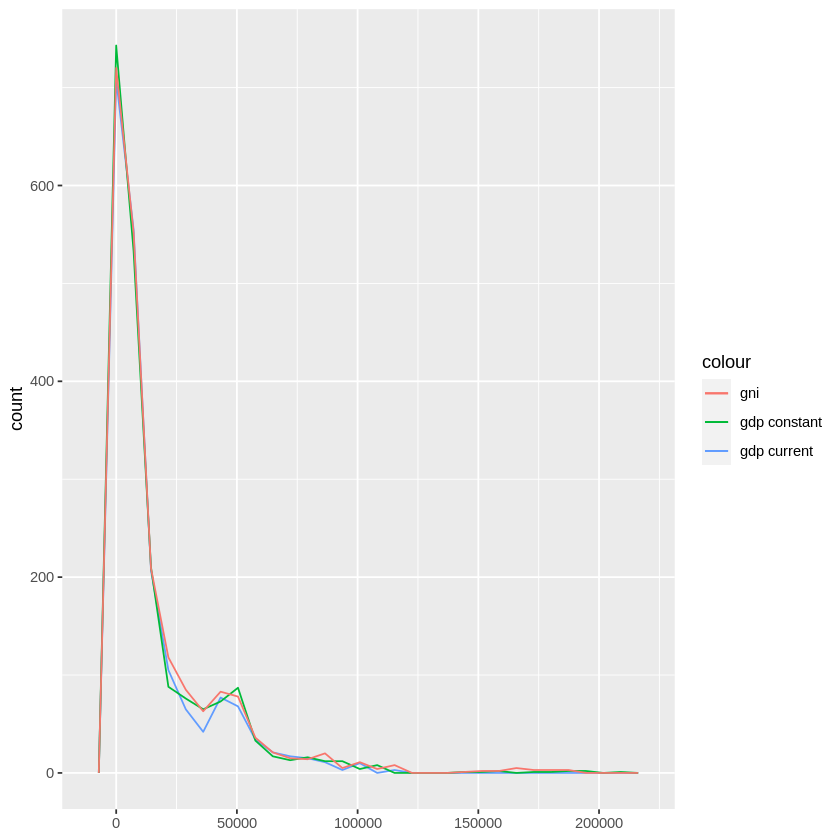

In [46]:
# Distribution of values for the economic indicators
 
ggplot(world_all) +
  geom_freqpoly(aes(gni_per_capita, colour = "orange"), na.rm = TRUE) +
  geom_freqpoly(aes(gdp_per_capita_constant_2010, colour = "green"), na.rm = TRUE) +
  geom_freqpoly(aes(gdp_per_capita_current, colour = "blue"), na.rm = TRUE) +
  scale_color_discrete(label = c("gni", "gdp constant", "gdp current")) +
  xlab(NULL)

,gni_per_capita,gdp_per_capita_constant_2010,gdp_per_capita_current
gni_per_capita,1.0000000,0.9804328,0.9847645
gdp_per_capita_constant_2010,0.9804328,1.0000000,0.9897709
gdp_per_capita_current,0.9847645,0.9897709,1.0000000


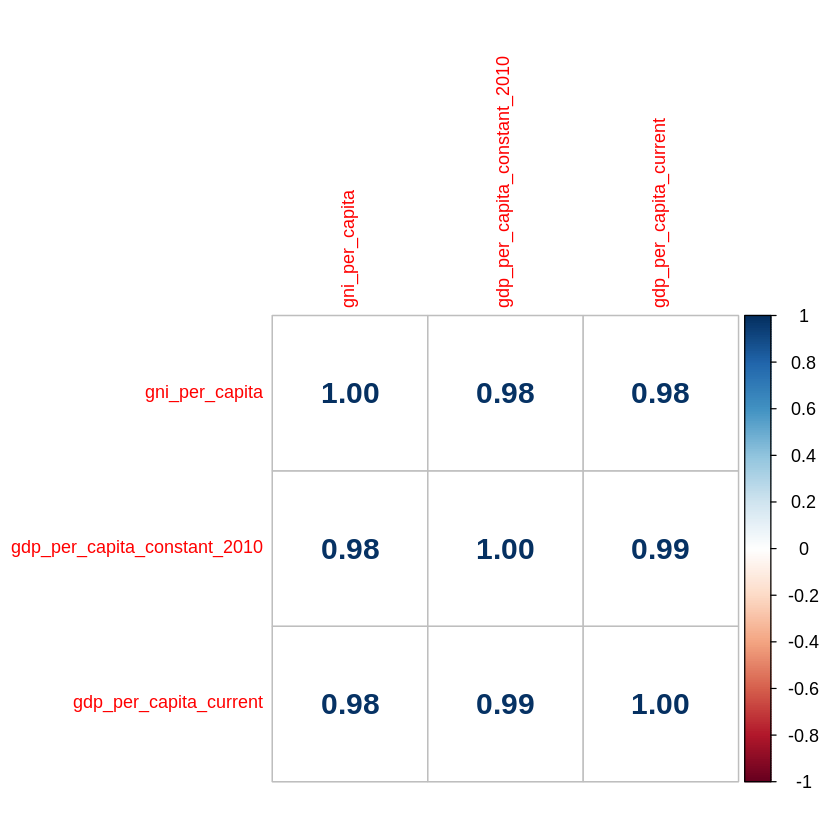

In [47]:
# Is there any correlation between the three economic indicators?

world_econ <- world_all %>% 
              select(7, 23, 24) %>%
              drop_na() %>%
              as.matrix() %>% 
              rcorr(type = "pearson")
world_econ$r

try(corrplot(world_econ$r, method = "number", p.mat = world_econ$P, sig.level = 0.05, 
         insig =  "pch", tl.cex = 0.9, number.cex = 1.5, cl.ratio = 0.3, cl.cex = 0.9), silent = TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



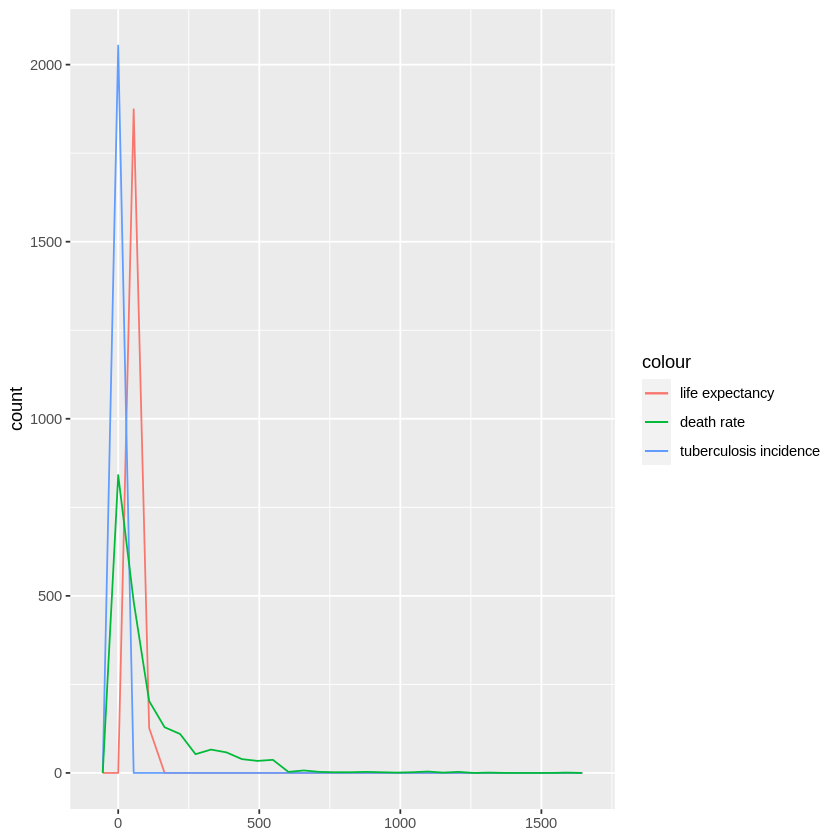

In [48]:
# Distribution of values for health indicators

ggplot(world_all) +
  geom_freqpoly(aes(life_expectancy_at_birth, colour = "green"), na.rm = TRUE) +
  geom_freqpoly(aes(death_rate_crude_per_1_000, colour = "red"), na.rm = TRUE) +
  geom_freqpoly(aes(incidence_of_tuberculosis_per_100_000, colour = "orange"), na.rm = TRUE) +
  scale_color_discrete(label = c("life expectancy", "death rate", "tuberculosis incidence")) +
  xlab(NULL)

,gni_per_capita,gdp_per_capita_constant_2010,gdp_per_capita_current,death_rate_crude_per_1_000,life_expectancy_at_birth,incidence_of_tuberculosis_per_100_000
gni_per_capita,1.00000000,0.98259894,0.98701899,-0.08837435,0.6308718,-0.3481493
gdp_per_capita_constant_2010,0.98259894,1.00000000,0.98909555,-0.07626428,0.6303577,-0.3475932
gdp_per_capita_current,0.98701899,0.98909555,1.00000000,-0.09688246,0.6216883,-0.3435382
death_rate_crude_per_1_000,-0.08837435,-0.07626428,-0.09688246,1.00000000,-0.3142392,0.2263658
life_expectancy_at_birth,0.63087183,0.63035770,0.62168825,-0.31423924,1.0000000,-0.6533346
incidence_of_tuberculosis_per_100_000,-0.34814933,-0.34759321,-0.34353820,0.22636576,-0.6533346,1.0000000


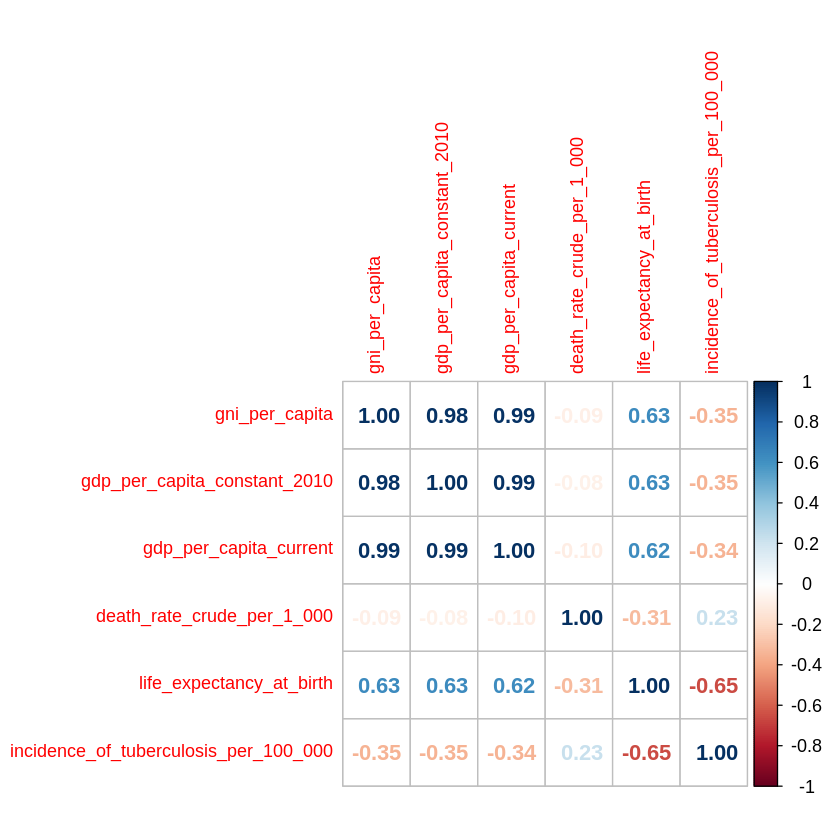

In [49]:
# Is there any correlation between economic and health indicators?

world_econ_health <- world_all %>% 
                     select(7, 23, 24, 12, 13, 18) %>%
                     drop_na() %>%
                     as.matrix() %>% 
                     rcorr(type = "pearson")
world_econ_health$r

try(corrplot(world_econ_health$r, method = "number", p.mat = world_econ_health$P,sig.level = 0.05,
         insig =  "pch", tl.cex = 0.9, number.cex = 1.1, cl.ratio = 0.25, cl.cex = 0.9), silent = TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



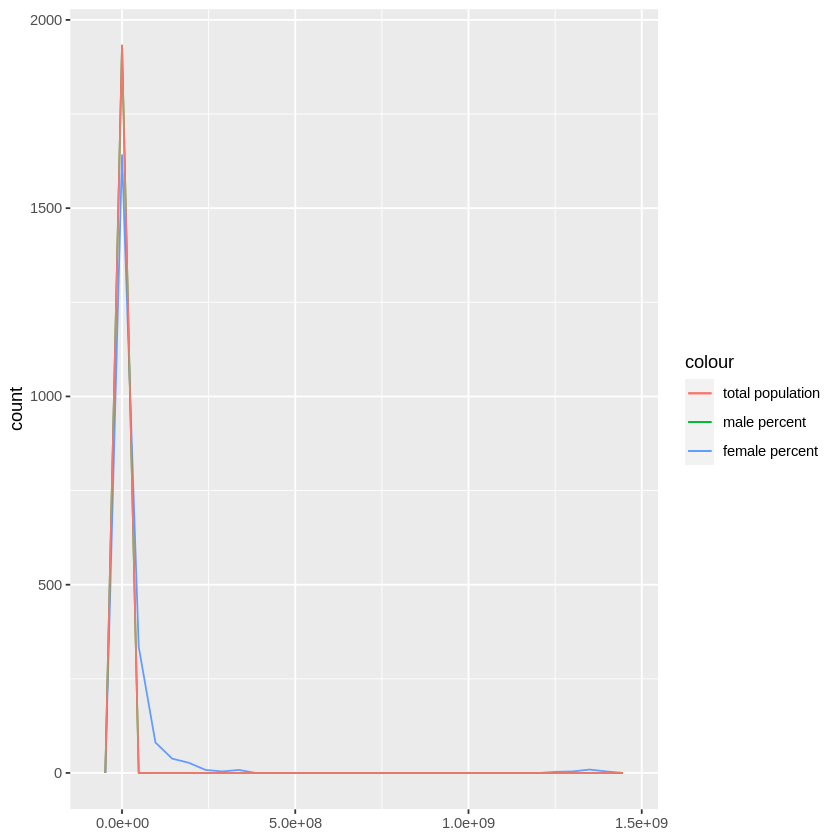

In [50]:
# Distribution of values for population indicators

ggplot(world_all) +
  geom_freqpoly(aes(population_total, colour = "orange"), na.rm = TRUE) +
  geom_freqpoly(aes(male_percent_total_population, colour = "green"), na.rm = TRUE) +
  geom_freqpoly(aes(female_percent_total_population, colour = "blue"), na.rm = TRUE) +
  scale_color_discrete(label = c("total population", "male percent", "female percent")) +
  xlab(NULL)

,gni_per_capita,gdp_per_capita_constant_2010,gdp_per_capita_current,population_total,male_percent_total_population,female_percent_total_population
gni_per_capita,1.00000000,0.98218941,0.98571405,-0.04412238,0.19138371,-0.19138371
gdp_per_capita_constant_2010,0.98218941,1.00000000,0.98858652,-0.04873536,0.17882120,-0.17882120
gdp_per_capita_current,0.98571405,0.98858652,1.00000000,-0.04898447,0.18536065,-0.18536065
population_total,-0.04412238,-0.04873536,-0.04898447,1.00000000,0.02835927,-0.02835927
male_percent_total_population,0.19138371,0.17882120,0.18536065,0.02835927,1.00000000,-1.00000000
female_percent_total_population,-0.19138371,-0.17882120,-0.18536065,-0.02835927,-1.00000000,1.00000000


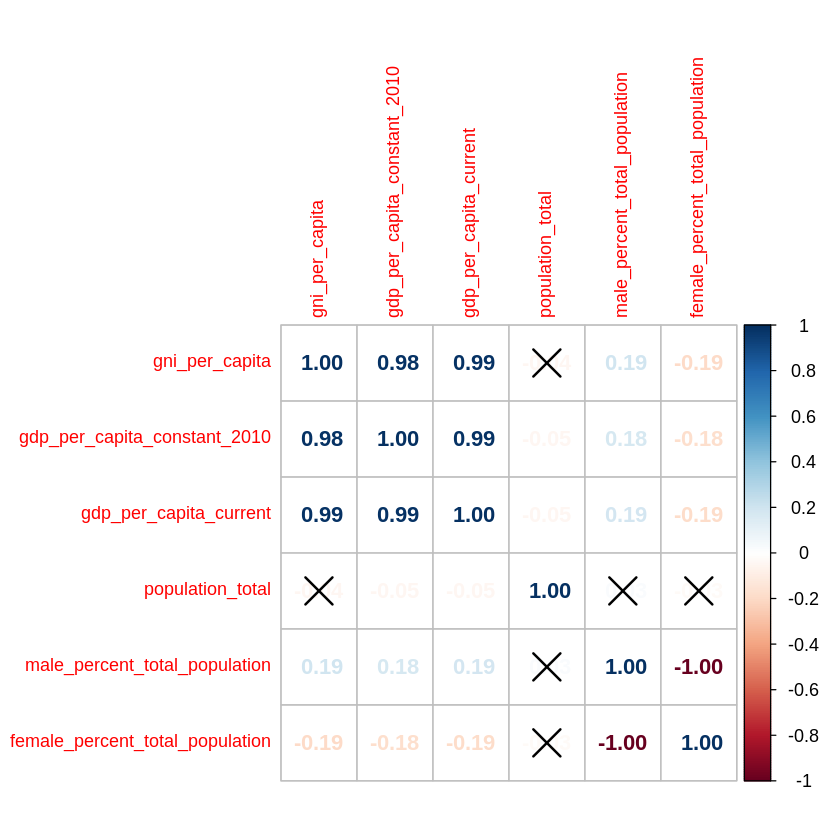

In [51]:
# Is there any correlation between economic and population indicators?

world_econ_pop <- world_all %>% 
                   select(7, 23, 24, 15, 16, 17) %>% 
                   drop_na() %>%
                   as.matrix() %>% 
                   rcorr(type = "pearson")
world_econ_pop$r

try(corrplot(world_econ_pop$r, method = "number", p.mat = world_econ_pop$P,sig.level = 0.05, 
         insig =  "pch", tl.cex = 0.9, number.cex = 1.1, cl.ratio = 0.25, cl.cex = 0.9), silent = TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



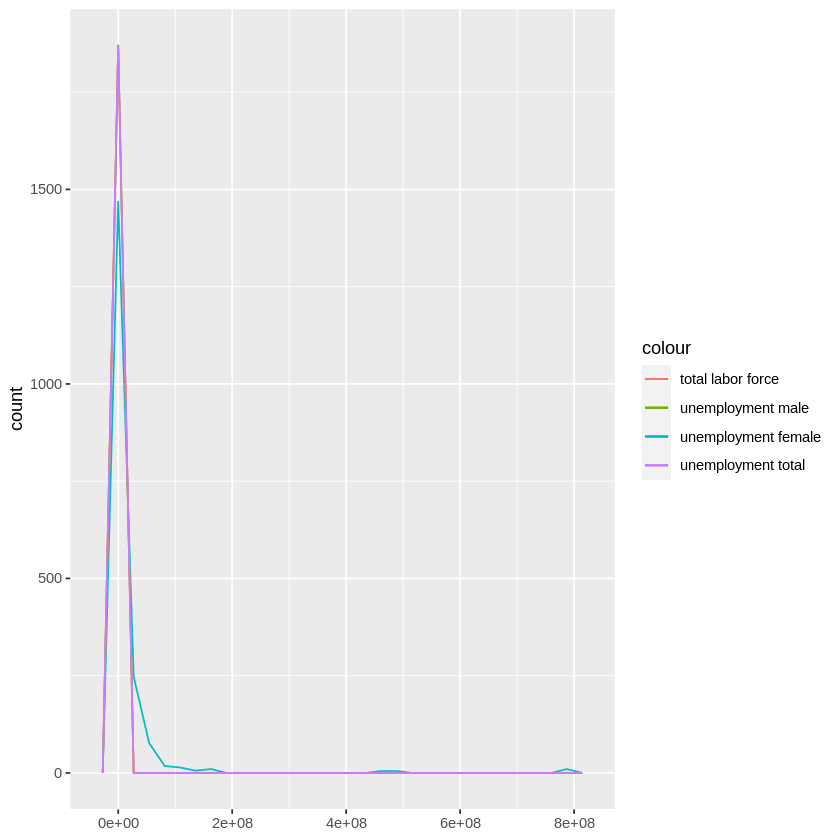

In [52]:
# Distribution of values for unemployment indicators

ggplot(world_all) +
  geom_freqpoly(aes(labor_force_total, colour = "orange"), na.rm = TRUE) +
  geom_freqpoly(aes(unemployment_male_percent_of_male_labor_force, colour = "green"), na.rm = TRUE) +
  geom_freqpoly(aes(unemployment_female_percent_of_female_labor_force, colour = "blue"), na.rm = TRUE) +
  geom_freqpoly(aes(unemployment_total_percent_of_total_labor_force, colour = "red"), na.rm = TRUE) +
  scale_color_discrete(label = c("total labor force", "unemployment male", "unemployment female", 
                                 "unemployment total")) +
  xlab(NULL)

,gni_per_capita,gdp_per_capita_constant_2010,gdp_per_capita_current,labor_force_total,unemployment_female_percent_of_female_labor_force,unemployment_male_percent_of_male_labor_force,unemployment_total_percent_of_total_labor_force
gni_per_capita,1.00000000,0.98210812,0.98564903,-0.02725554,-0.1455559,-0.07392597,-0.10850279
gdp_per_capita_constant_2010,0.98210812,1.00000000,0.98853903,-0.03309137,-0.1340207,-0.05739328,-0.09263485
gdp_per_capita_current,0.98564903,0.98853903,1.00000000,-0.03265321,-0.1474296,-0.07456935,-0.10948860
labor_force_total,-0.02725554,-0.03309137,-0.03265321,1.00000000,-0.1038325,-0.07943085,-0.09335669
unemployment_female_percent_of_female_labor_force,-0.14555589,-0.13402072,-0.14742961,-0.10383250,1.0000000,0.84791481,0.92908813
unemployment_male_percent_of_male_labor_force,-0.07392597,-0.05739328,-0.07456935,-0.07943085,0.8479148,1.00000000,0.97813671
unemployment_total_percent_of_total_labor_force,-0.10850279,-0.09263485,-0.10948860,-0.09335669,0.9290881,0.97813671,1.00000000


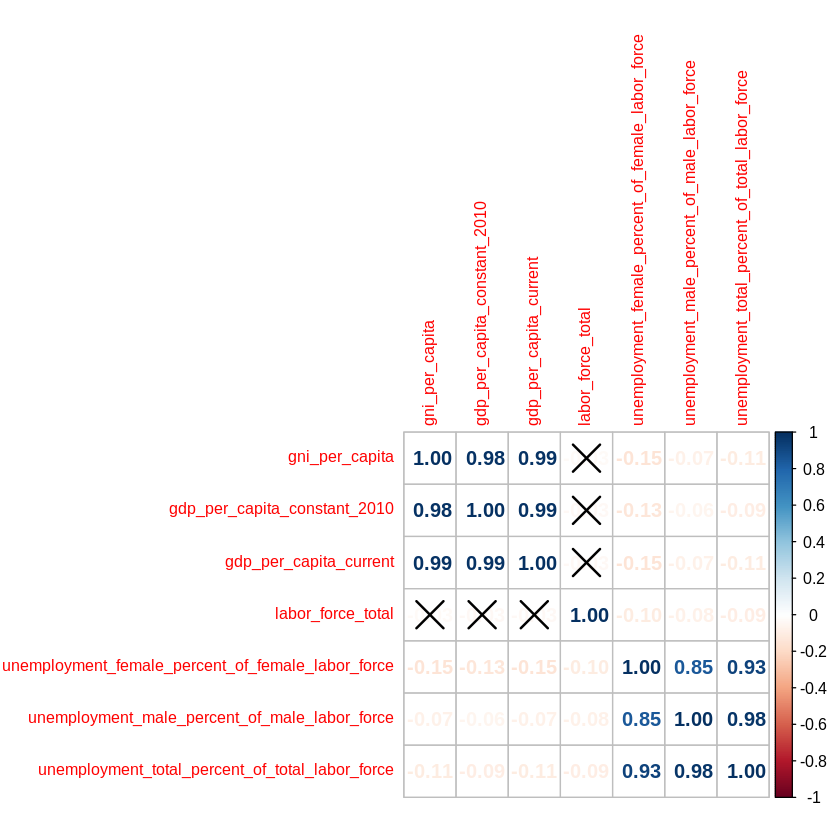

In [53]:
# Is there any correlation between economic and unemployment indicators?

world_econ_lab <- world_all %>% 
                  select(7, 23, 24, c(8:11)) %>% 
                  drop_na() %>% 
                  as.matrix() %>% 
                  rcorr(type = "pearson")
world_econ_lab$r

try(corrplot(world_econ_lab$r, method = "number", p.mat = world_econ_lab$P, sig.level = 0.05, 
         insig =  "pch", tl.cex = 0.8, number.cex = 1.0, cl.ratio = 0.2, cl.cex = 0.8), silent = TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



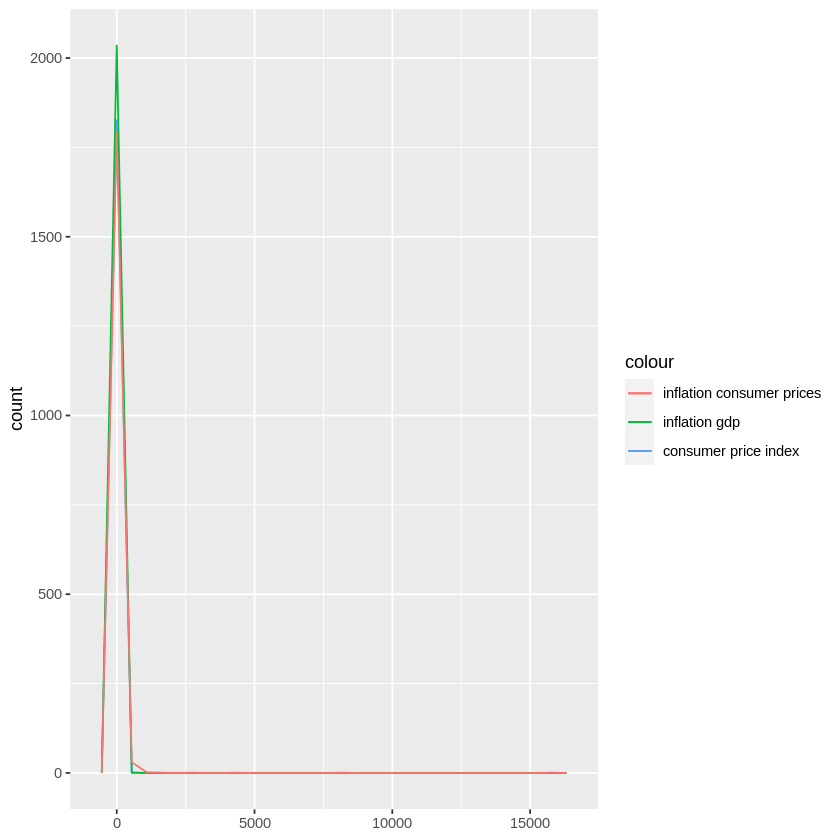

In [54]:
# Distribution of values for inflation indicators

ggplot(world_all) +
  geom_freqpoly(aes(inflation_consumer_prices_annual_percent, colour = "orange"), na.rm = TRUE) +
  geom_freqpoly(aes(inflation_gdp_deflator_annual_percent, colour = "green"), na.rm = TRUE) +
  geom_freqpoly(aes(consumer_price_index_2010, colour = "blue"), na.rm = TRUE) +
  scale_color_discrete(label = c("inflation consumer prices", "inflation gdp", "consumer price index")) +
  xlab(NULL)

,gni_per_capita,gdp_per_capita_constant_2010,gdp_per_capita_current,inflation_consumer_prices_annual_percent,inflation_gdp_deflator_annual_percent,consumer_price_index_2010
gni_per_capita,1.0000000,0.9803464,0.9838179,-0.2459702,-0.2305163,-0.1806957
gdp_per_capita_constant_2010,0.9803464,1.0000000,0.9893371,-0.2391768,-0.2161945,-0.1749454
gdp_per_capita_current,0.9838179,0.9893371,1.0000000,-0.2383986,-0.2077910,-0.1770188
inflation_consumer_prices_annual_percent,-0.2459702,-0.2391768,-0.2383986,1.0000000,0.7074945,0.5543871
inflation_gdp_deflator_annual_percent,-0.2305163,-0.2161945,-0.2077910,0.7074945,1.0000000,0.3999207
consumer_price_index_2010,-0.1806957,-0.1749454,-0.1770188,0.5543871,0.3999207,1.0000000


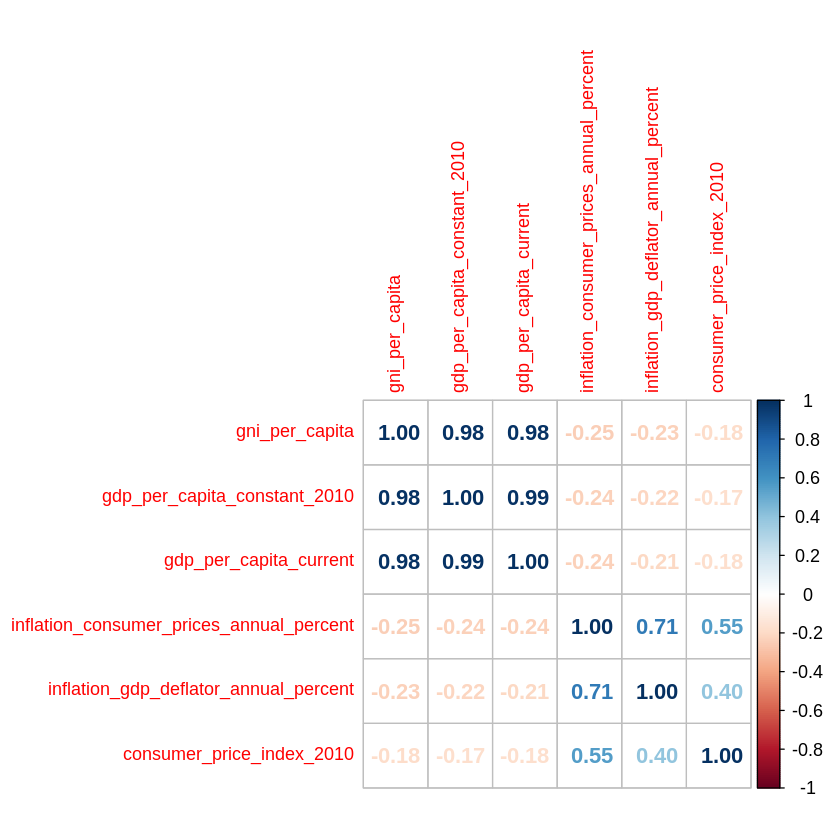

In [55]:
# Is there any correlation between economic and inflation indicators?

world_econ_inf <- world_all %>% 
                  select(7, 23, 24, c(19:21)) %>% 
                  drop_na() %>%
                  as.matrix() %>% 
                  rcorr(type = "pearson")
world_econ_inf$r

try(corrplot(world_econ_inf$r, method = "number", p.mat = world_econ_inf$P, 
         sig.level = 0.05,insig =  "pch", tl.cex = 0.9, number.cex = 1.1, 
         cl.ratio = 0.25, cl.cex = 0.9), silent = TRUE)

#### From the correlation analysis, the `economic indicators` are only correlated with `life_expectancy_at_birth` one of the health indicators but not with the other indicators. Hence, further analysis and visualizations will only focus on these two groups of indicators.

In [56]:
# Summary statistics of economic indicators for the period (2010 - 2019)

world_all %>% 
select(7, 23, 24) %>%  
summarise(across(where(is.numeric), list(mean = mean, min = min, max = max, median = median, 
                                        iqr = IQR), na.rm = TRUE))

gni_per_capita_mean,gni_per_capita_min,gni_per_capita_max,gni_per_capita_median,gni_per_capita_iqr,gdp_per_capita_constant_2010_mean,gdp_per_capita_constant_2010_min,gdp_per_capita_constant_2010_max,gdp_per_capita_constant_2010_median,gdp_per_capita_constant_2010_iqr,gdp_per_capita_current_mean,gdp_per_capita_current_min,gdp_per_capita_current_max,gdp_per_capita_current_median,gdp_per_capita_current_iqr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14503.72,220,117740,5700,15270,16058.68,208.0748,209224.5,6142.409,18038.24,17401.85,234.2355,190512.7,6497.315,19465.69


In [57]:
# Summary statistics of economic indicators by year

world_all %>% 
select(1, 7, 23, 24) %>%  
group_by(year) %>%
summarise(across(where(is.numeric), list(mean = mean, min = min, max = max, median = median, 
                                        iqr = IQR), na.rm = TRUE))

year,gni_per_capita_mean,gni_per_capita_min,gni_per_capita_max,gni_per_capita_median,gni_per_capita_iqr,gdp_per_capita_constant_2010_mean,gdp_per_capita_constant_2010_min,gdp_per_capita_constant_2010_max,gdp_per_capita_constant_2010_median,gdp_per_capita_constant_2010_iqr,gdp_per_capita_current_mean,gdp_per_capita_current_min,gdp_per_capita_current_max,gdp_per_capita_current_median,gdp_per_capita_current_iqr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,13438.96,220,103480,4580,13442.5,15846.83,234.2355,150737.9,5642.873,18179.80,15846.83,234.2355,150737.9,5642.873,18179.80
2011,13783.37,230,101610,4960,13450.0,15315.26,235.9888,159427.0,5465.238,16239.27,17459.26,249.5780,169016.2,6190.986,20117.34
2012,14444.30,250,100100,5790,13900.0,15427.95,238.8159,159104.6,5748.474,16439.63,17375.92,252.3589,157520.2,6675.178,19652.46
2013,15170.46,260,104190,6460,16165.0,15619.35,242.8457,172299.2,5982.326,15883.22,17979.94,256.9756,177673.7,6927.046,19390.90
2014,15297.60,260,104370,6445,16492.5,15850.99,245.3266,182621.1,6232.934,16058.24,18326.09,274.8578,189432.4,6678.627,19462.23
2015,14589.49,260,101120,5800,15610.0,16059.73,228.4324,189523.0,6263.482,17549.77,16609.83,293.4552,167313.3,6124.491,17445.93
2016,14142.86,270,103620,5550,14810.0,16405.16,219.9614,194368.4,6396.221,18196.47,16824.87,282.1930,170028.7,5933.047,17752.99
2017,14144.46,280,112940,5410,14835.0,16655.25,214.1395,186185.1,6561.224,19298.22,17666.84,292.9980,171254.0,6336.134,18937.61
2018,15044.69,280,117000,5830,16042.5,16901.03,210.8042,196061.4,6519.687,18240.30,18740.93,271.7525,185978.6,6962.584,20882.03


In [58]:
# Summary statistics of economic indicators by region

world_all %>% 
select(6, 7, 23, 24) %>%
group_by(region) %>%
summarise(across(where(is.numeric), list(mean = mean, min = min, max = max, median = median, 
                                        iqr = IQR), na.rm = TRUE))

region,gni_per_capita_mean,gni_per_capita_min,gni_per_capita_max,gni_per_capita_median,gni_per_capita_iqr,gdp_per_capita_constant_2010_mean,gdp_per_capita_constant_2010_min,gdp_per_capita_constant_2010_max,gdp_per_capita_constant_2010_median,gdp_per_capita_constant_2010_iqr,gdp_per_capita_current_mean,gdp_per_capita_current_min,gdp_per_capita_current_max,gdp_per_capita_current_median,gdp_per_capita_current_iqr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
East Asia and Pacific,15102.370,750,76510,4365,23145.0,14508.008,785.5027,71974.44,4331.231,23001.807,16033.474,785.5027,93022.88,4566.118,24994.613
Europe and Central Asia,25399.719,850,104370,15140,37497.5,30562.121,749.5524,209224.51,18112.100,39526.782,32855.341,749.5524,190512.74,19174.100,40888.134
Latin America and Caribbean,11541.030,1120,71050,8550,9940.0,11916.650,1172.0990,80755.96,8328.303,9245.277,13733.391,1172.0990,91392.64,9250.616,11014.089
Middle East and North Africa,16597.268,940,80890,7020,20130.0,16189.802,632.9087,69679.40,6565.258,18919.572,16545.652,824.1177,85075.99,6637.684,21195.055
North America,69927.667,42900,117740,56290,51477.5,65214.450,47562.0834,101875.28,52096.477,39774.679,69605.665,42315.6037,117098.45,55956.680,48307.811
South Asia,2415.625,510,9670,1500,1910.0,2375.631,528.7367,8476.50,1322.693,2260.487,2598.535,493.7566,10626.43,1473.570,2292.424
Sub Saharan Africa,2341.017,220,15930,1195,1527.5,2508.447,208.0748,18254.10,1161.572,1763.561,2513.422,234.2355,21711.15,1179.740,1603.907


In [59]:
# Summary statistics of economic indicators by year and region

world_all %>% 
select(1, 6, 7, 23, 24) %>%
group_by(year, region) %>%
summarise(across(where(is.numeric), list(mean = mean, min = min, max = max, median = median, 
                                        iqr = IQR), na.rm = TRUE))

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,region,gni_per_capita_mean,gni_per_capita_min,gni_per_capita_max,gni_per_capita_median,gni_per_capita_iqr,gdp_per_capita_constant_2010_mean,gdp_per_capita_constant_2010_min,gdp_per_capita_constant_2010_max,gdp_per_capita_constant_2010_median,gdp_per_capita_constant_2010_iqr,gdp_per_capita_current_mean,gdp_per_capita_current_min,gdp_per_capita_current_max,gdp_per_capita_current_median,gdp_per_capita_current_iqr
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,East Asia and Pacific,12345.000,750,46630,3460,17437.5,13268.423,785.5027,52473.191,3609.497,18692.555,13268.423,785.5027,52473.191,3609.497,18692.555
2010,Europe and Central Asia,24875.000,850,88490,13675,37757.5,30872.223,749.5524,150737.892,18355.433,38738.471,30872.223,749.5524,150737.892,18355.433,38738.471
2010,Latin America and Caribbean,10061.667,1120,70220,7100,6625.0,11971.952,1172.0990,73351.757,8154.574,8980.053,11971.952,1172.0990,73351.757,8154.574,8980.053
2010,Middle East and North Africa,15667.895,1200,63620,7470,16345.0,15261.409,1334.7849,67403.088,7180.651,17478.881,15261.409,1334.7849,67403.088,7180.651,17478.881
2010,North America,65653.333,44490,103480,48990,29495.0,65968.008,47562.0834,101875.284,48466.658,27156.600,65968.008,47562.0834,101875.284,48466.658,27156.600
2010,South Asia,1806.250,510,5960,1095,1397.5,2049.551,543.3030,7076.740,1172.487,1659.587,2049.551,543.3030,7076.740,1172.487,1659.587
2010,Sub Saharan Africa,2062.174,220,10220,1020,1415.0,2340.689,234.2355,17288.843,1036.535,1399.570,2340.689,234.2355,17288.843,1036.535,1399.570
2011,East Asia and Pacific,13510.667,810,54490,3740,18222.5,13808.177,827.7771,62354.203,3759.720,18837.766,15239.782,882.2756,66891.282,4187.131,19606.020
2011,Europe and Central Asia,25185.600,880,90330,13680,36085.0,28868.029,787.2289,159427.048,16568.096,37937.195,33923.675,847.3824,169016.196,20116.418,41461.885


In [60]:
# Summary statistics of health indicators for the period (2010 - 2019)

world_all %>% 
select(12, 13, 18) %>%
summarise(across(where(is.numeric), list(mean = mean, min = min, max = max, median = median, 
                                        iqr = IQR), na.rm = TRUE))

death_rate_crude_per_1_000_mean,death_rate_crude_per_1_000_min,death_rate_crude_per_1_000_max,death_rate_crude_per_1_000_median,death_rate_crude_per_1_000_iqr,life_expectancy_at_birth_mean,life_expectancy_at_birth_min,life_expectancy_at_birth_max,life_expectancy_at_birth_median,life_expectancy_at_birth_iqr,incidence_of_tuberculosis_per_100_000_mean,incidence_of_tuberculosis_per_100_000_min,incidence_of_tuberculosis_per_100_000_max,incidence_of_tuberculosis_per_100_000_median,incidence_of_tuberculosis_per_100_000_iqr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.727196,1.127,19.325,7.302,3.53025,71.81533,45.1,85.41707,73.45854,10.954,116.816,0,1590,46,144


In [61]:
# Summary statistics of health indicators by year

world_all %>% 
select(1, 12, 13, 18) %>%  
group_by(year) %>%
summarise(across(where(is.numeric), list(mean = mean, min = min, max = max, median = median, 
                                        iqr = IQR), na.rm = TRUE))

year,death_rate_crude_per_1_000_mean,death_rate_crude_per_1_000_min,death_rate_crude_per_1_000_max,death_rate_crude_per_1_000_median,death_rate_crude_per_1_000_iqr,life_expectancy_at_birth_mean,life_expectancy_at_birth_min,life_expectancy_at_birth_max,life_expectancy_at_birth_median,life_expectancy_at_birth_iqr,incidence_of_tuberculosis_per_100_000_mean,incidence_of_tuberculosis_per_100_000_min,incidence_of_tuberculosis_per_100_000_max,incidence_of_tuberculosis_per_100_000_median,incidence_of_tuberculosis_per_100_000_iqr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,8.014408,1.211,19.325,7.4575,3.82950,70.40839,45.100,82.97805,72.72050,11.58450,134.4662,0,1590,50.5,146.75
2011,7.914980,1.173,18.669,7.4540,3.63300,70.77513,46.207,83.42195,72.74620,11.40621,129.6226,0,1300,50.0,163.00
2012,7.852551,1.148,17.936,7.4000,3.61400,71.19742,47.416,85.41707,73.04250,11.19279,125.7520,0,1160,49.0,159.00
2013,7.774828,1.132,17.177,7.4590,3.43375,71.44928,48.663,83.83171,73.14476,11.05886,122.1083,0,1110,47.0,157.00
2014,7.669832,1.127,16.433,7.4515,3.36375,71.80177,49.891,83.98049,73.30300,11.10805,117.0907,0,1070,47.0,153.00
2015,7.676390,1.131,15.750,7.3450,3.39300,72.04289,50.881,84.27805,73.64900,10.48724,113.7592,0,988,49.0,149.00
2016,7.619618,1.146,15.157,7.2830,3.38250,72.32082,51.593,84.22683,73.83600,10.78900,110.8553,0,805,46.0,150.00
2017,7.610878,1.169,15.500,7.2100,3.30000,72.53146,52.240,84.68049,74.03000,10.68173,106.9692,0,738,44.0,138.00
2018,7.577800,1.202,15.400,7.1630,3.30000,72.72195,52.805,84.93415,74.09700,10.57686,105.6938,0,918,45.0,132.00


In [62]:
# Summary statistics of health indicators by region

world_all %>% 
select(6, 12, 13, 18) %>%
group_by(region) %>%
summarise(across(where(is.numeric), list(mean = mean, min = min, max = max, median = median, 
                                        iqr = IQR), na.rm = TRUE))

region,death_rate_crude_per_1_000_mean,death_rate_crude_per_1_000_min,death_rate_crude_per_1_000_max,death_rate_crude_per_1_000_median,death_rate_crude_per_1_000_iqr,life_expectancy_at_birth_mean,life_expectancy_at_birth_min,life_expectancy_at_birth_max,life_expectancy_at_birth_median,life_expectancy_at_birth_iqr,incidence_of_tuberculosis_per_100_000_mean,incidence_of_tuberculosis_per_100_000_min,incidence_of_tuberculosis_per_100_000_max,incidence_of_tuberculosis_per_100_000_median,incidence_of_tuberculosis_per_100_000_iqr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
East Asia and Pacific,6.395914,3.657,11.100,6.3230,1.86000,73.81915,62.02900,85.07805,72.86500,9.457750,172.472973,0.00,918.0,81.00,276.250
Europe and Central Asia,9.514186,2.800,16.100,9.4000,3.98225,77.28142,66.65700,85.41707,77.45122,7.607317,33.607500,0.00,234.0,14.50,46.325
Latin America and Caribbean,6.622332,2.900,9.629,6.6425,2.80025,74.76523,60.51100,82.19024,74.93850,4.586250,32.525725,0.00,229.0,22.00,36.925
Middle East and North Africa,4.479495,1.127,9.156,4.7995,2.25425,74.59977,60.06200,82.80488,75.18050,4.939750,43.352286,0.53,621.0,18.00,30.000
North America,7.719033,6.500,8.700,7.6500,0.93150,80.50270,78.53902,82.04878,81.18988,2.977988,3.656667,0.00,5.6,3.65,2.075
South Asia,6.184475,2.764,8.250,6.4185,1.16700,70.28314,61.02800,78.92100,69.75500,6.177000,182.425000,29.00,311.0,202.50,116.750
Sub Saharan Africa,9.143450,4.761,19.325,8.6710,3.23225,60.76658,45.10000,74.51463,60.76400,6.831250,262.880376,9.70,1590.0,202.00,249.000


In [63]:
# Summary statistics of health indicators by year and region

world_all %>% 
select(1, 6, 12, 13, 18) %>%  
group_by(year, region) %>%
summarise(across(where(is.numeric), list(mean = mean, min = min, max = max, median = median, 
                                        iqr = IQR), na.rm = TRUE))

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,region,death_rate_crude_per_1_000_mean,death_rate_crude_per_1_000_min,death_rate_crude_per_1_000_max,death_rate_crude_per_1_000_median,death_rate_crude_per_1_000_iqr,life_expectancy_at_birth_mean,life_expectancy_at_birth_min,life_expectancy_at_birth_max,life_expectancy_at_birth_median,life_expectancy_at_birth_iqr,incidence_of_tuberculosis_per_100_000_mean,incidence_of_tuberculosis_per_100_000_min,incidence_of_tuberculosis_per_100_000_max,incidence_of_tuberculosis_per_100_000_median,incidence_of_tuberculosis_per_100_000_iqr
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,East Asia and Pacific,6.368531,3.668,9.500,6.5085,2.10425,72.77662,62.02900,82.97805,71.66300,10.327744,176.602703,6.50,531.0,81.0,308.000
2010,Europe and Central Asia,9.440600,2.800,16.100,9.5000,3.14800,76.13002,66.65700,82.24634,76.24634,7.312195,42.094231,0.00,231.0,18.0,57.200
2010,Latin America and Caribbean,6.416872,3.000,9.629,6.5660,2.54700,74.09737,60.51100,82.19024,74.22400,4.706250,35.355000,2.40,229.0,21.0,34.850
2010,Middle East and North Africa,4.509429,1.211,9.156,4.6560,2.05000,73.80833,60.06200,81.60244,74.35800,3.949000,56.331429,0.96,621.0,21.0,28.000
2010,North America,7.431667,7.000,7.995,7.3000,0.49750,79.69211,78.54146,81.24634,79.28854,1.352439,3.533333,1.80,4.6,4.2,1.400
2010,South Asia,6.477750,3.529,8.250,6.6145,1.56250,68.77563,61.02800,75.90500,67.99750,4.934750,197.625000,32.00,311.0,230.0,96.000
2010,Sub Saharan Africa,10.601437,5.848,19.325,10.1440,3.58875,57.99898,45.10000,73.19756,57.28050,6.431000,320.361702,12.00,1590.0,219.0,261.000
2011,East Asia and Pacific,6.312061,3.657,9.900,6.4010,2.10500,73.00684,62.31600,83.42195,71.90600,9.754854,172.010811,6.20,535.0,79.0,271.000
2011,Europe and Central Asia,9.477741,4.900,15.200,9.4000,3.00000,76.54267,66.92800,82.69512,76.69512,7.324390,40.753846,0.00,234.0,17.0,55.525


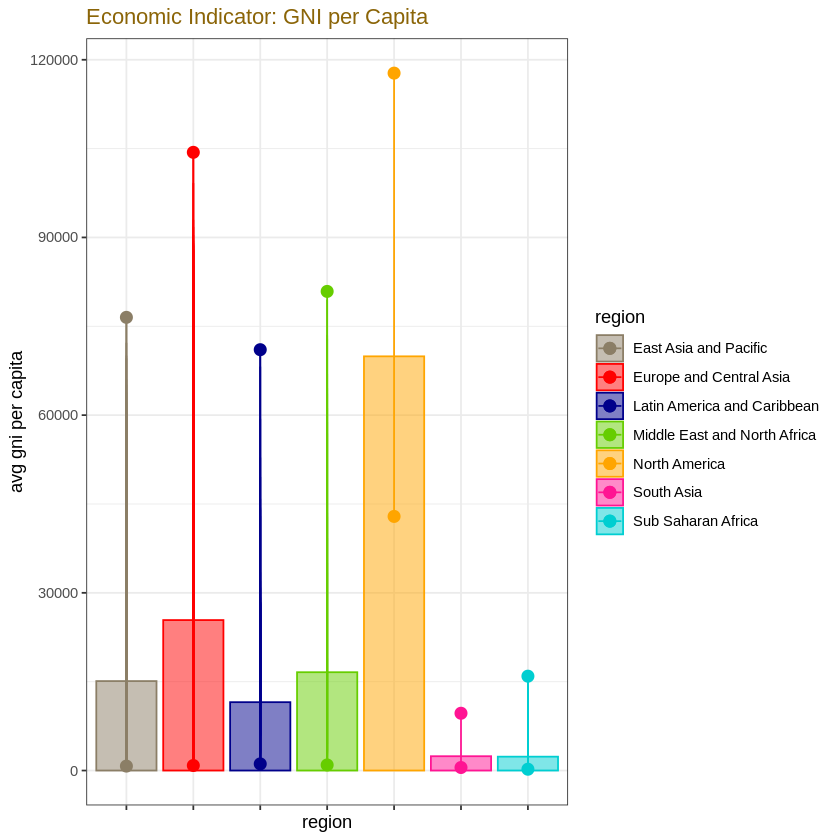

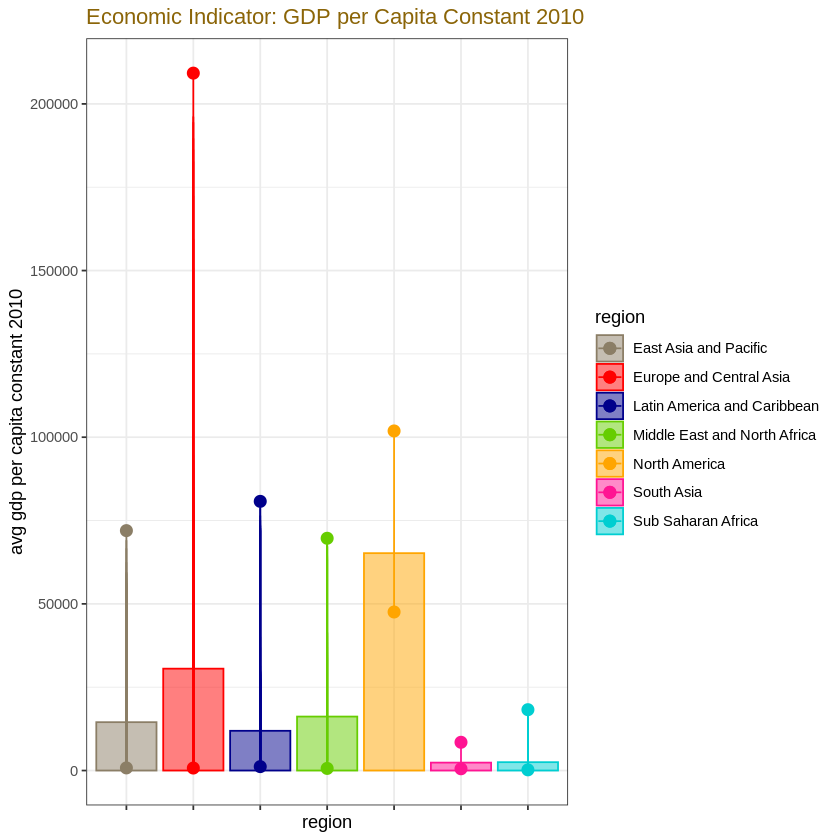

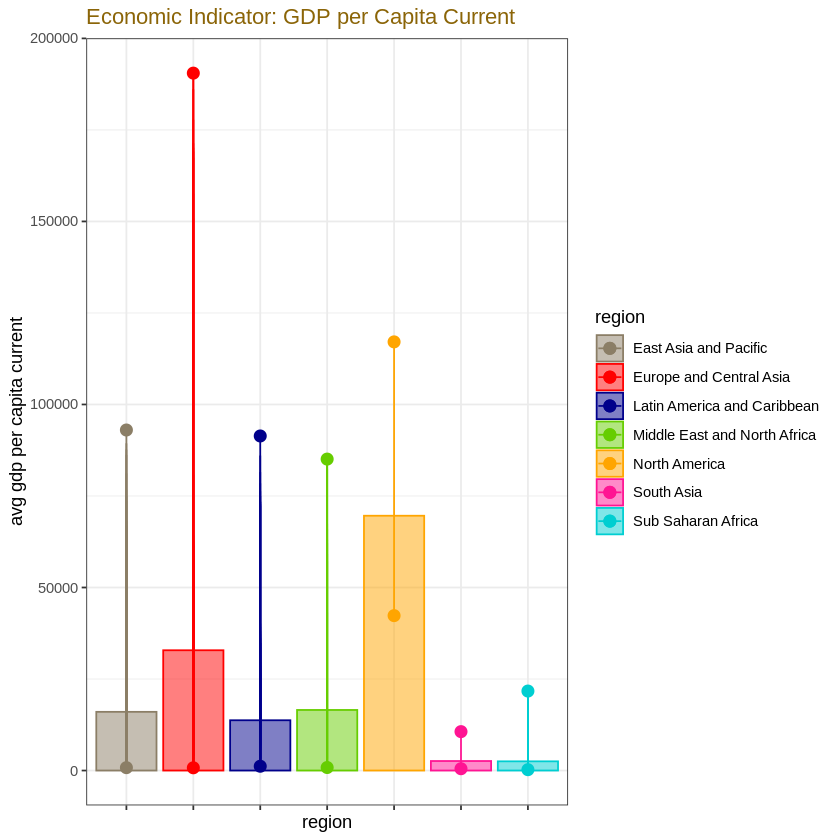

In [76]:
# Let's visualize some of the summary statistics for the economic indicators - mean, min and max

colour_scale <- c("East Asia and Pacific" = "wheat4", "Europe and Central Asia" = "red", 
                 "Latin America and Caribbean" = "darkblue", "Middle East and North Africa" = "chartreuse3", 
                 "North America" = "orange", "South Asia" = "deeppink", 
                  "Sub Saharan Africa" = "darkturquoise")

gni <- world_all %>% 
      ggplot(aes(region, gni_per_capita, color = region, fill = region)) +
      stat_summary(fun = "mean", geom = "bar", na.rm = TRUE, alpha = 0.5) +
      stat_summary(fun = "min", geom = "point", size = 3, na.rm = TRUE) +
      stat_summary(fun = "max", geom = "point", size = 3, na.rm = TRUE) +
      geom_line(na.rm = TRUE) +
      theme_bw() +
      theme(axis.text.x = element_blank(), plot.title = element_text(colour = "darkgoldenrod4")) +
      ylab("avg gni per capita") +
      scale_color_manual(values = colour_scale) +
      scale_fill_manual(values = colour_scale) +
      ggtitle("Economic Indicator: GNI per Capita")

gni

gdp_constant <- world_all %>%
      ggplot(aes(region, gdp_per_capita_constant_2010, color = region, fill = region)) +
      stat_summary(fun = "mean", geom = "bar", na.rm = TRUE, alpha = 0.5) +
      stat_summary(fun = "min", geom = "point", size = 3, na.rm = TRUE) +
      stat_summary(fun = "max", geom = "point", size = 3, na.rm = TRUE) +
      geom_line(na.rm = TRUE) +
      theme_bw() +
      theme(axis.text.x = element_blank(), plot.title = element_text(colour = "darkgoldenrod4")) +
      ylab("avg gdp per capita constant 2010") +
      scale_color_manual(values = colour_scale) +
      scale_fill_manual(values = colour_scale) +
      ggtitle("Economic Indicator: GDP per Capita Constant 2010")

gdp_constant

gdp_current <- world_all %>% 
      ggplot(aes(region, gdp_per_capita_current, color = region, fill = region)) +
      stat_summary(fun = "mean", geom = "bar", na.rm = TRUE, alpha = 0.5) +
      stat_summary(fun = "min", geom = "point", size = 3, na.rm = TRUE) +
      stat_summary(fun = "max", geom = "point", size = 3, na.rm = TRUE) +
      geom_line(na.rm = TRUE) +
      theme_bw() +
      theme(axis.text.x = element_blank(), plot.title = element_text(colour = "darkgoldenrod4")) +
      ylab("avg gdp per capita current") +
      scale_color_manual(values = colour_scale) +
      scale_fill_manual(values = colour_scale) +
      ggtitle("Economic Indicator: GDP per Capita Current")

gdp_current

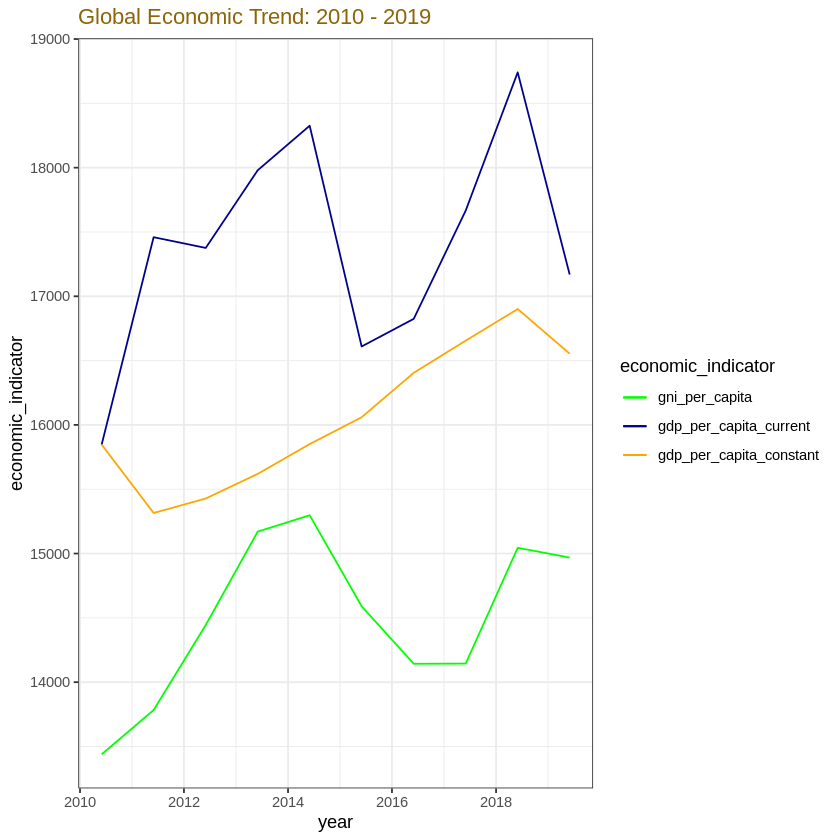

In [77]:
# How did the economic indicators trend over the last decade?

economic_ind <- world_all %>% 
                select(1, 7, 23, 24) %>%
                group_by(year) %>%
                summarise(across(where(is.numeric), list(mean = mean), na.rm = TRUE))
economic_ind$year <- as.Date(economic_ind$year, "%Y") # for some reasons the chart will not work
                                                      # unless year is converted to date data type

ggplot(economic_ind, aes(x = year)) +
geom_line(aes(y = gni_per_capita_mean, colour = "gni_per_capita")) +
geom_line(aes(y = gdp_per_capita_current_mean, colour = "gdp_per_capita_current")) +
geom_line(aes(y = gdp_per_capita_constant_2010_mean, colour = "gdp_per_capita_constant")) +
labs(y = "economic_indicator", color = "economic_indicator", 
     title = "Global Economic Trend: 2010 - 2019") +
scale_color_manual(values=c("gni_per_capita" = "green", "gdp_per_capita_current" = "darkblue",
                           "gdp_per_capita_constant" = "orange")) +
theme_bw() +
theme(plot.title = element_text(colour = "darkgoldenrod4"))

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


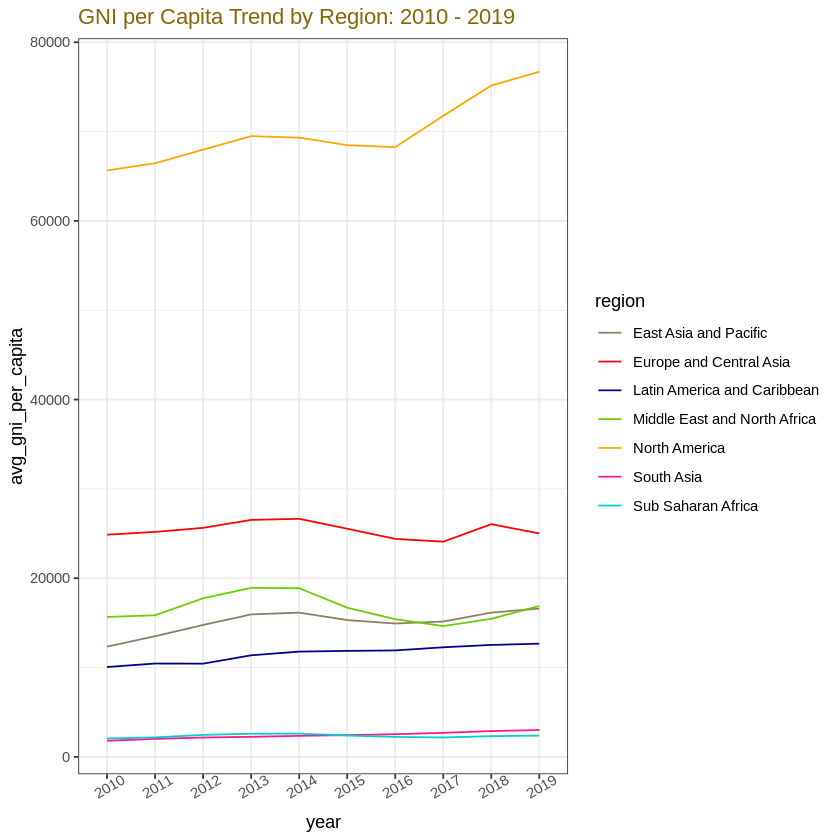

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


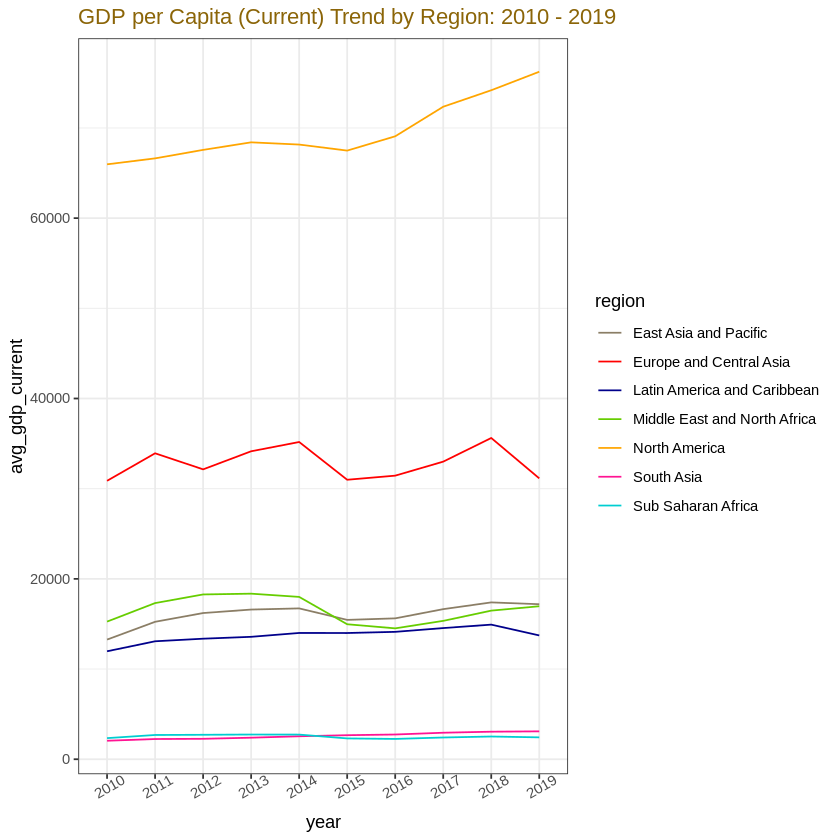

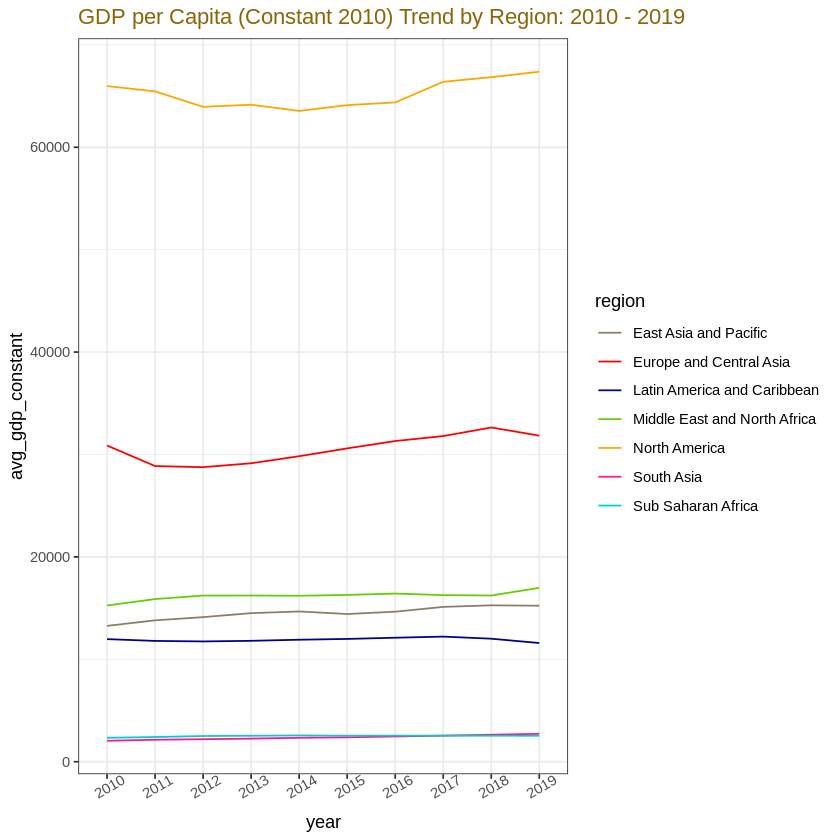

In [78]:
# How about how the economic indicators have trended for each region over the last decade

gni_trend <- world_all %>%
        group_by(region, year) %>%
        summarise(avg_gni_per_capita = mean(gni_per_capita, na.rm = TRUE)) %>% 
        ggplot(aes( year, avg_gni_per_capita, group = region, color = region)) +
        geom_line() +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 30), plot.title = element_text(colour = "darkgoldenrod4")) +
        scale_color_manual(values = colour_scale) +
        ggtitle("GNI per Capita Trend by Region: 2010 - 2019")

gni_trend

gdp_current <- world_all %>%
        group_by(region, year) %>%
        summarise(avg_gdp_current = mean(gdp_per_capita_current, na.rm = TRUE)) %>% 
        ggplot(aes( year, avg_gdp_current, group = region, color = region)) +
        geom_line() +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 30), plot.title = element_text(colour = "darkgoldenrod4")) +
        scale_color_manual(values = colour_scale) +
        ggtitle("GDP per Capita (Current) Trend by Region: 2010 - 2019")

gdp_current

gdp_constant <- world_all %>% 
        group_by(region, year) %>%
        summarise(avg_gdp_constant = mean(gdp_per_capita_constant_2010, na.rm = TRUE)) %>% 
        ggplot(aes( year, avg_gdp_constant, group = region, color = region)) +
        geom_line() +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 30), plot.title = element_text(colour = "darkgoldenrod4")) +
        scale_color_manual(values = colour_scale) +
        ggtitle("GDP per Capita (Constant 2010) Trend by Region: 2010 - 2019")

gdp_constant

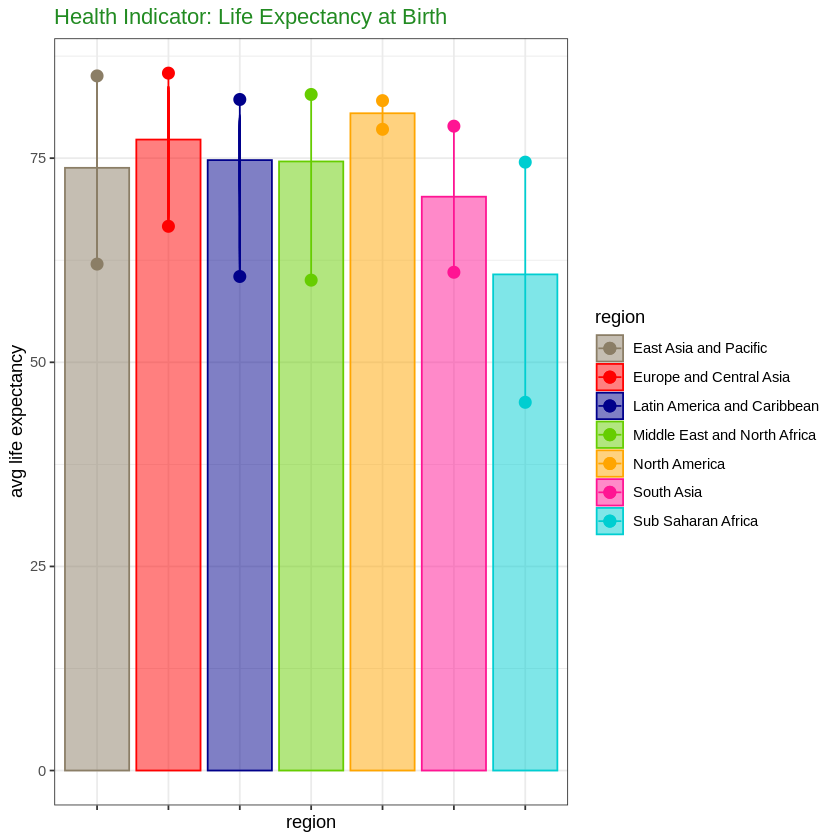

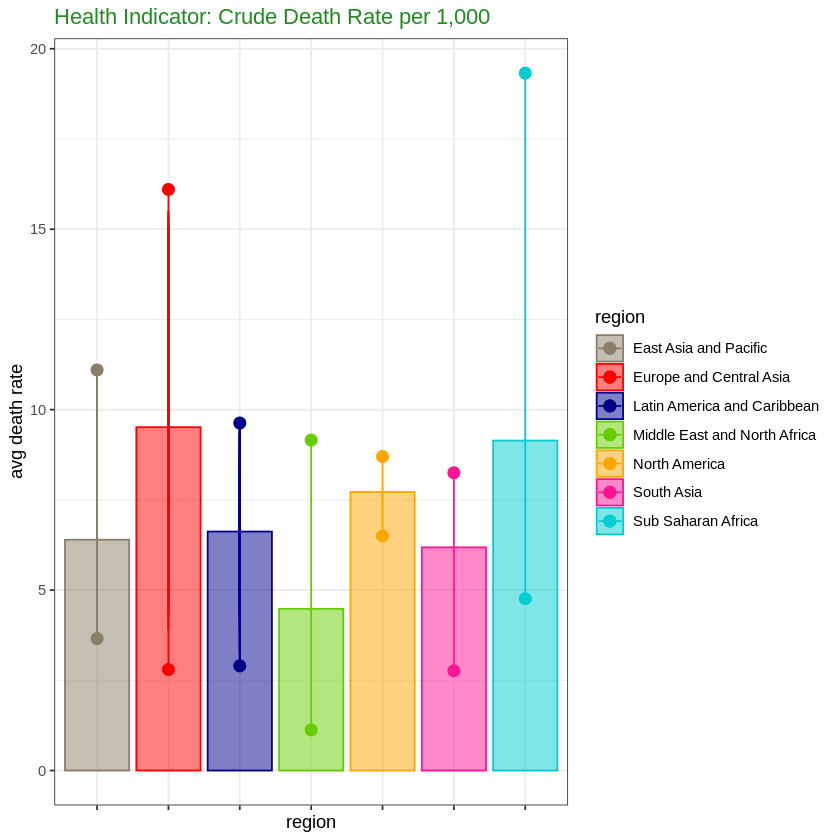

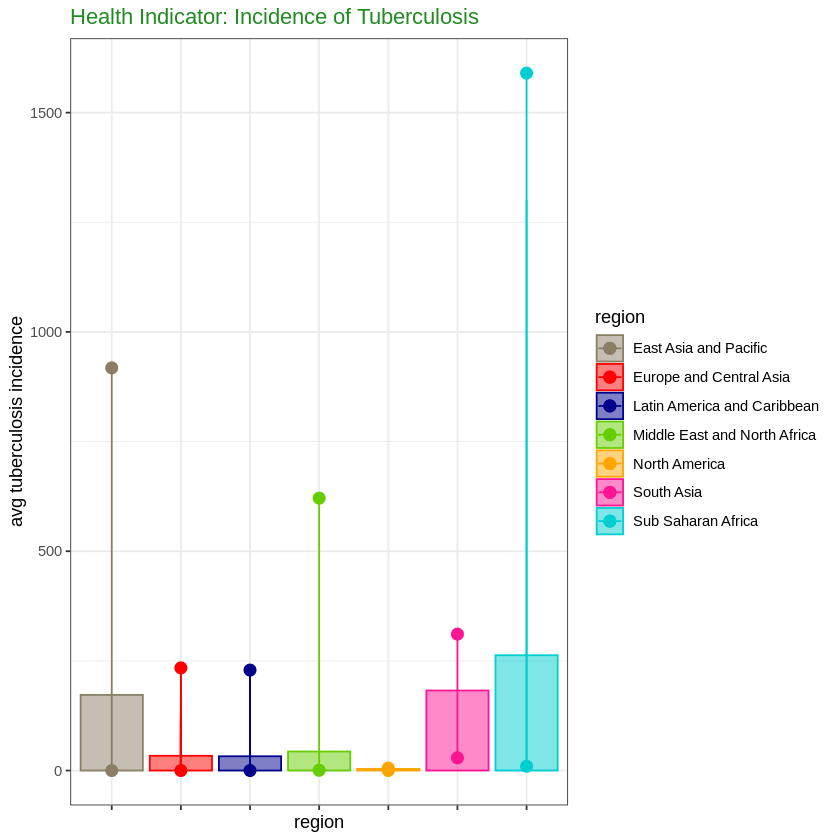

In [79]:
# Let's visualize some of the summary statistics for the health indicators - mean, min and max

life_expectancy <- world_all %>% 
      ggplot(aes(region, life_expectancy_at_birth, color = region, fill = region)) +
      stat_summary(fun = "mean", geom = "bar", na.rm = TRUE, alpha = 0.5) +
      stat_summary(fun = "min", geom = "point", size = 3, na.rm = TRUE) +
      stat_summary(fun = "max", geom = "point", size = 3, na.rm = TRUE) +
      geom_line(na.rm = TRUE) +
      theme_bw() +
      theme(axis.text.x = element_blank(), plot.title = element_text(colour = "forestgreen")) +
      ylab("avg life expectancy") +
      scale_color_manual(values = colour_scale) +
      scale_fill_manual(values = colour_scale) +
      ggtitle("Health Indicator: Life Expectancy at Birth")

life_expectancy

death_rate <- world_all %>%
      ggplot(aes(region, death_rate_crude_per_1_000, color = region, 
                 fill = region)) +
      stat_summary(fun = "mean", geom = "bar", na.rm = TRUE, alpha = 0.5) +
      stat_summary(fun = "min", geom = "point", size = 3, na.rm = TRUE) +
      stat_summary(fun = "max", geom = "point", size = 3, na.rm = TRUE) +
      geom_line(na.rm = TRUE) +
      theme_bw() +
      theme(axis.text.x = element_blank(), plot.title = element_text(colour = "forestgreen")) +
      ylab("avg death rate") +
      scale_color_manual(values = colour_scale) +
      scale_fill_manual(values = colour_scale) +
      ggtitle("Health Indicator: Crude Death Rate per 1,000")

death_rate

tuberculosis_incidence <- world_all %>% 
      ggplot(aes(region, incidence_of_tuberculosis_per_100_000, color = region, fill = region)) +
      stat_summary(fun = "mean", geom = "bar", na.rm = TRUE, alpha = 0.5) +
      stat_summary(fun = "min", geom = "point", size = 3, na.rm = TRUE) +
      stat_summary(fun = "max", geom = "point", size = 3, na.rm = TRUE) +
      geom_line(na.rm = TRUE) +
      theme_bw() +
      theme(axis.text.x = element_blank(), plot.title = element_text(colour = "forestgreen")) +
      ylab("avg tuberculosis incidence") +
      scale_color_manual(values = colour_scale) +
      scale_fill_manual(values = colour_scale) +
      ggtitle("Health Indicator: Incidence of Tuberculosis")

tuberculosis_incidence

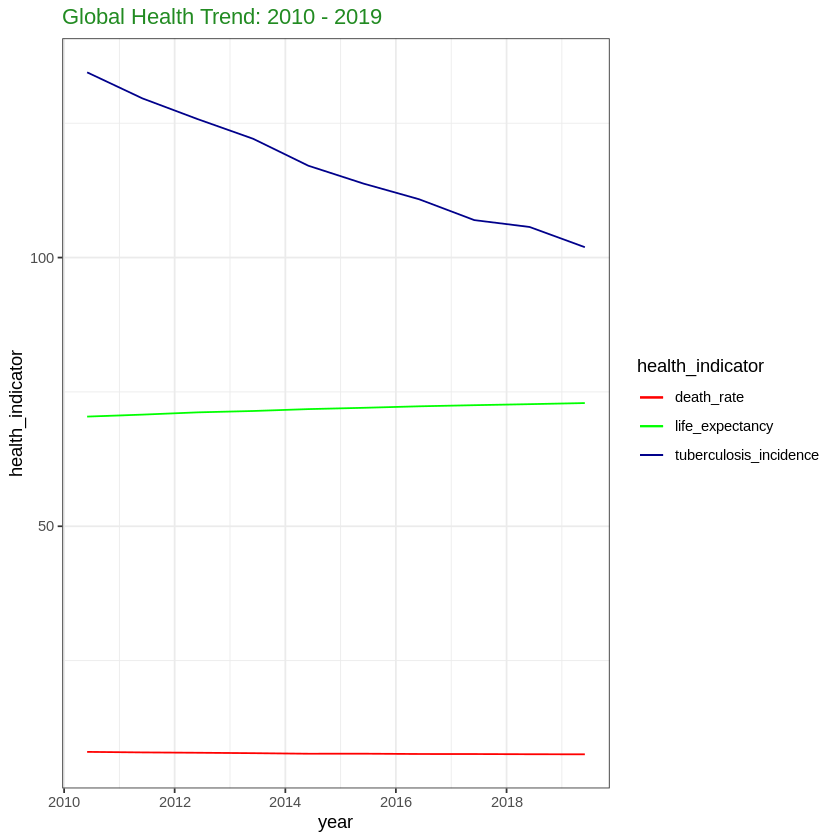

In [80]:
# How did the health indicators trend over the last decade?

health_ind <- world_all %>% 
              select(1, 12, 13, 18) %>%
              group_by(year) %>%
              summarise(across(where(is.numeric), list(mean = mean), na.rm = TRUE))
health_ind$year <- as.Date(health_ind$year, "%Y") # for some reasons the chart will not work
                                                      # unless year is converted to date data type

ggplot(health_ind, aes(x = year)) +
geom_line(aes(y = death_rate_crude_per_1_000_mean, colour = "death_rate")) +
geom_line(aes(y = life_expectancy_at_birth_mean, colour = "life_expectancy")) +
geom_line(aes(y = incidence_of_tuberculosis_per_100_000_mean, colour = "tuberculosis_incidence")) +
labs(y = "health_indicator", colour = "health_indicator", title = "Global Health Trend: 2010 - 2019") +
scale_color_manual(values=c("death_rate" = "red", "life_expectancy" = "green",
                           "tuberculosis_incidence" = "darkblue")) +
theme_bw() +
theme(plot.title = element_text(colour = "forestgreen"))

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


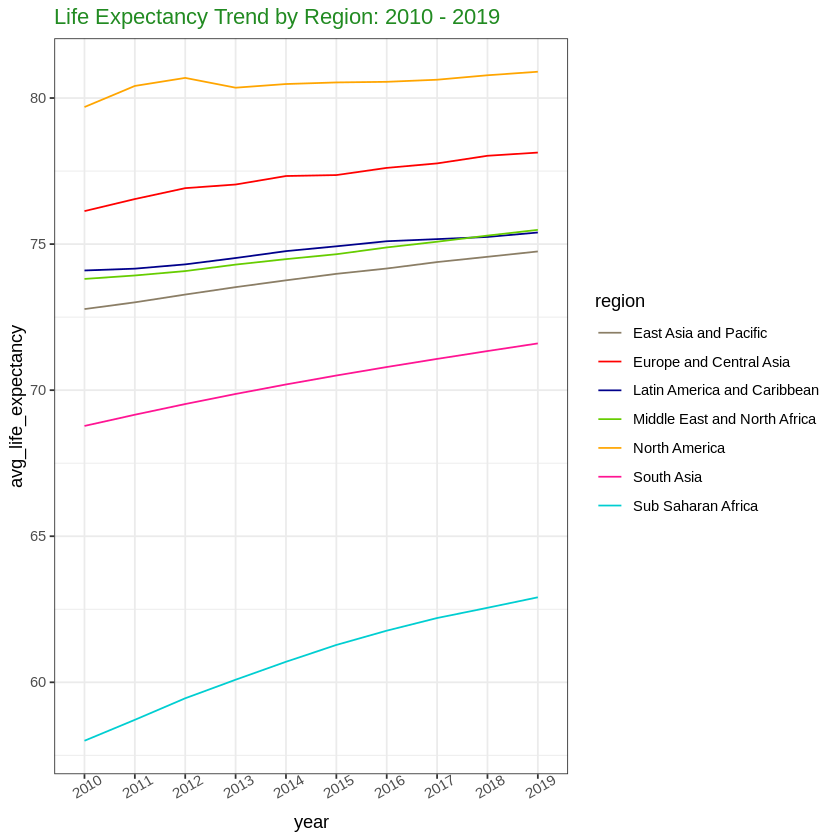

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


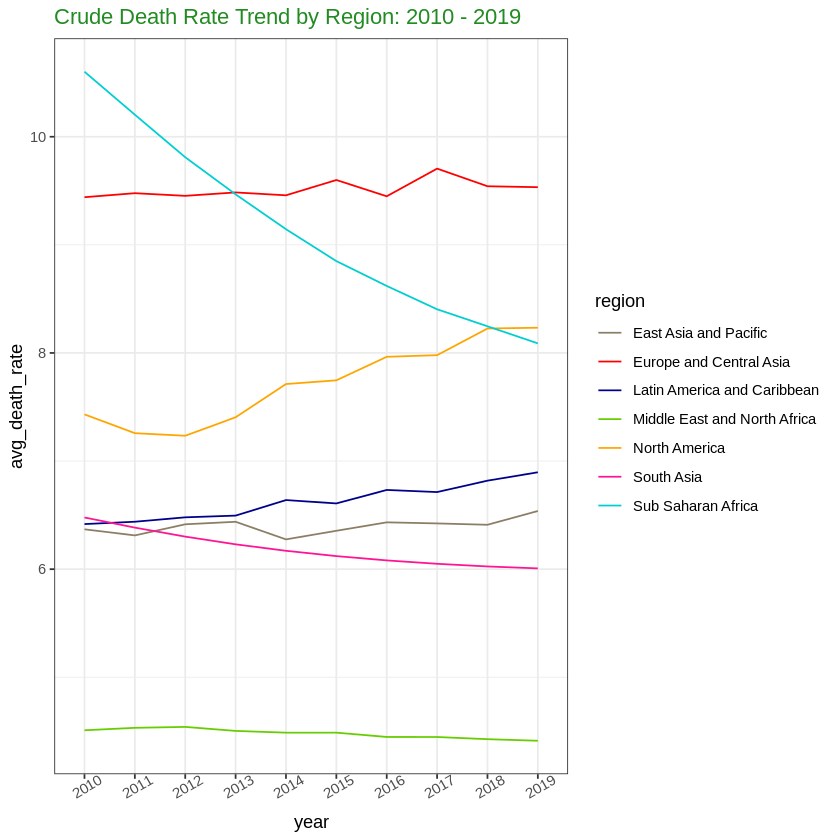

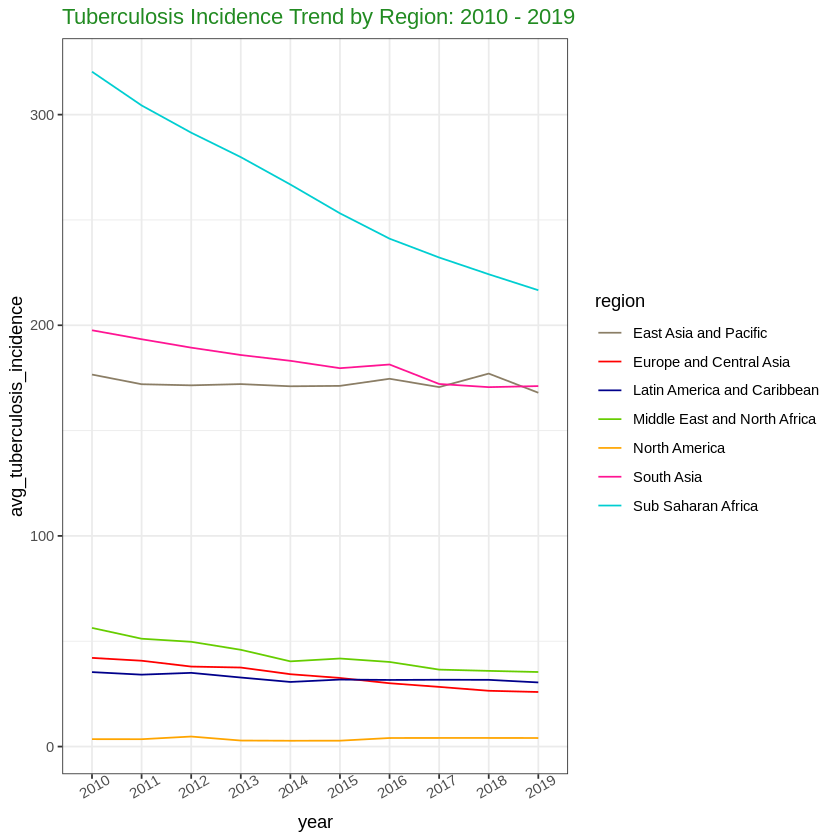

In [81]:
# How about how the health indicators have trended for each region over the last decade

life_exp <- world_all %>%
        group_by(region, year) %>%
        summarise(avg_life_expectancy = mean(life_expectancy_at_birth, na.rm = TRUE)) %>% 
        ggplot(aes( year, avg_life_expectancy, group = region, color = region)) +
        geom_line() +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 30), plot.title = element_text(colour = "forestgreen")) +
        scale_color_manual(values = colour_scale) +
        ggtitle("Life Expectancy Trend by Region: 2010 - 2019")

life_exp

death_rate <- world_all %>% 
        group_by(region, year) %>%
        summarise(avg_death_rate = mean(death_rate_crude_per_1_000, na.rm = TRUE)) %>% 
        ggplot(aes(year, avg_death_rate, group = region, color = region)) +
        geom_line() +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 30), plot.title = element_text(colour = "forestgreen")) +
        scale_color_manual(values = colour_scale) +
        ggtitle("Crude Death Rate Trend by Region: 2010 - 2019")

death_rate

tuberculosis_incidence <- world_all %>%
        group_by(region, year) %>%
        summarise(avg_tuberculosis_incidence = mean(incidence_of_tuberculosis_per_100_000, na.rm = TRUE)) %>% 
        ggplot(aes( year, avg_tuberculosis_incidence, group = region, color = region)) +
        geom_line() +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 30), plot.title = element_text(colour = "forestgreen")) +
        scale_color_manual(values = colour_scale) +
        ggtitle("Tuberculosis Incidence Trend by Region: 2010 - 2019")

tuberculosis_incidence

## Result  
The three economic indicators used in this project, `gni_per_capita`, `gdp_per_capita_current` and `gdp_per_capita_constant_2010` are highly positively correlated (correlation coefficient, r, > 0.9). Also, `gni_per_capita` and `gdp_per_capita_current` largely follow the same trend.
Furthermore, from the analysis, the indicators of economic development correlated with `life_expectancy_at_birth`, but not with other indicators. If you were born in a country with a good economy, you will probably live longer. As `life_expectancy_at_birth` is one of the health indicators, the analysis was expanded to include other health indicators.  
Talking about economy, there is huge disparity in terms of economic development between the seven regions, with South Asia and Sub-Saharan Africa being the least developed regions and North America the most economically developed. An area of possible further analysis is exploring the wide intra-regional disparity in economic development seen in East Asia and Pacific, Europe and Central Asia, Latin America and Caribbean and Middle East and North Africa region.  
Over the past decade, there were ups and downs globally in terms of economic development with the global economy ending the decade higher than the level it was in 2010. Europe and Central Asia, Middle East and North Africa and East Asia and Pacific regions were the main contributors to the economic fluctuations.  
Between 2010 and 2019, life expectancy improved slightly globally. While Sub Saharan Africa had the biggest improvement in life expectancy, it is worthy of note that all regions had improvement in average life expectancy. However, with regards to death rate, it is a mixed result. While some regions such as Sub-Saharan Africa and South Asia saw a reduction in death rate over the past decade, others like North America and Latin America and Caribbean had some increase in death_rate over same period.  
Furthermore, there was significant reduction in the global incidence of tuberculosis in the past decade. Of the three regions with the greatest contributions to the world’s tuberculosis burden, Sub Saharan Africa had the greatest decline in tuberculosis incidence over the last decade followed by South Asia.

